# Press Aghing Ovens - 2018 Initial Data Unboxing

## Setup

### Confidentiality

**All information in this document is strictly confidiental**
**Copyright (C) 2019 HES-SO Valais-Wallis - All Rights Reserved**

### Import sub-modules

In [148]:
# Import required sub-modules

# python
import sys
import os
import enum
import datetime

# iPython
import IPython
from IPython.display import display

# pandas
import pandas as pd

# numpy
import numpy as np

# plotly
import plotly as ply
import plotly.figure_factory as ff
ply.offline.init_notebook_mode(connected=True)


# Verbose what we are working with
print("python: {}".format(sys.version))
print("    - os")
print("    - datetime")
print("    - enum")

print("ipython {}".format(IPython.__version__))

print("pandas: {}".format(pd.__version__))

print("numpy: {}".format(np.__version__))

print("plotly: {}".format(ply.__version__))


python: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
    - os
    - datetime
    - enum
ipython 6.5.0
pandas: 0.23.4
numpy: 1.15.1
plotly: 3.6.1


### Configurations

In [149]:
# Setup local input directories
inputDir = "input/"

if (os.path.exists(inputDir)) is False:
    os.makedirs(inputDir)
if (os.path.isdir(inputDir)) is False:
    raise NotADirectoryError("{} is not a directory".format(inputDir))


In [150]:
# Setup local input directories
outputDir = "output/"

if (os.path.exists(outputDir)) is False:
    os.makedirs(outputDir)
if (os.path.isdir(outputDir)) is False:
    raise NotADirectoryError("{} is not a directory".format(outputDir))


In [151]:
# Graph output type
class GraphOutputOption(enum.Enum):
    none = 'none'                     # Do not generate any plots
    inline = 'inline'                 # Generate inline plots only
    htmlFile = 'htmlFile'             # Generate plots in external HTML files
    both = 'both'                     # Generate plots both inline and in external html files


notebookGraphingOutputs = GraphOutputOption('both')

GraphAutoOpenHTML = False              # Auto opn external HTML files [True/False]


## Data Import

### Data source

We received this data export by mail as 2 CSV files:
* 2018_DataPreemballage.csv
* 2018_DataRevenuPresse.csv
>From: Santschi, Bernard [mailto:bernard.santschi@constellium.com]
>Sent: vendredi, 25 janvier 2019 08:09
>To: Jérôme Corre <jerome.corre@hevs.ch>
>Subject: Constellium SmartLab : revenu P
>
>Salut Jérôme,
>
>Comme convenu.
>
>Salutations
>Bernard

We then received an updated version of one of the CSV files:
* 2018_DataRevenuPresse_V2.csv
>From: Santschi, Bernard <bernard.santschi@constellium.com>
>Sent: mercredi, 13 mars 2019 16:59
>To: Jérôme Corre <jerome.corre@hevs.ch>
>Subject: RE: Constellium SmartLab : revenu P
>
>Salut Jérôme,
>J’ai regardé cette histoire de date. J’ai un produit cartésien dans ma requête lorsque le même of passe dans deux charges différentes comme ce cas par exemple :
>
>000000303732;21;FOUR_7;20180622 082030;20180622 182101;42;13862;68;2018680199;P63076;6072;140;6;175;4
>000000303732;21;FOUR_7;20180622 042658;20180622 142709;42;13862;68;2018680199;P63076;6072;140;6;175;4
>000000303732;21;FOUR_7;20180622 082030;20180622 182101;42;13862;67;2018670204;P63076;6072;140;6;175;4
>000000303732;21;FOUR_7;20180622 042658;20180622 142709;42;13862;67;2018670204;P63076;6072;140;6;175;4
>
>La réalité est celle-ci :
>
>ORDRE           QTEPLAN PDTPLAN  DEBUT           FIN                 QTEBON   POIDSBON NO NOCHARGE   PROFILE            ALLIAGE          TEMPREVENU1 DUREEREVENU1 TEMPREVENU2 DUREEREVENU2
>------------ ---------- -------- --------------- --------------- ---------- ---------- -- ---------- ------------------ ---------------- ----------- ------------ ----------- ------------
>000000303732         21 FOUR_7   20180622 082030 20180622 182101         42      13862 67 2018670204 P63076             6072                     140            6         175            4
>000000303732         21 FOUR_7   20180622 042658 20180622 142709         42      13862 68 2018680199 P63076             6072                     140            6         175            4
>
>J’ai relancée la même extraction avec la correction pour supprimer le produit cartésien, le résultat est en annexe.
>
>Désolé du contre-temps.
>
>Salutations
>
>Bernard Santschi
>Constellium Valais SA
>CH-3960 Sierre

We had to clean this updated version to ensure that only the data was n the CSV file and that it had an header row

### CSV to pandas DF

In [152]:
# Import CSV files into a pandas dataframe
fourExcelExportFileName = '2018_DataRevenuPresse_V2_Clean.csv'
fourExcelExportFilePath = inputDir + fourExcelExportFileName
rawFourDf = pd.read_csv(fourExcelExportFilePath, sep=';')

rawFourDf.head()

,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
0,300306,2,FOUR_7,20180207 083714,20180208 014135,2,430.000000,67,2018670046,P62244,6065,153,17.0,NaN,NaN
1,299569,2,FOUR_9,20180110 063615,20180110 234222,2,252.000000,65,2018650010,P62147,6084,158,17.0,NaN,NaN
2,301578,44,FOUR_9,20180403 101227,20180404 031148,43,4351.795455,68,2018680107,P62900,6065,153,17.0,NaN,NaN
3,300704,12,FOUR_9,20180306 203310,20180307 133158,12,1450.000000,65,2018650071,P63388,6065,153,17.0,NaN,NaN
4,303693,13,FOUR_9,20180514 191318,20180515 051344,13,2837.000000,49,2018490139,P63192,6084,140,6.0,175.0,4.0


### Data Header Description

In [153]:
# Count the number of columns in the Data
rawFourDf.shape[1]

15

In [154]:
# List all headers
list(rawFourDf)

['ordre',
 'qtePlan',
 'pdtPlan',
 'debut',
 'fin',
 'qteBon',
 'poidsBon',
 'noFour',
 'noCharge',
 'profile',
 'alliage',
 'tempRevenu1',
 'dureeRevenu1',
 'tempRevenu2',
 'dureeRevenu2']

***
**'ordre'**: French abbreviation 'ordre de fabrication' or 'O.F.',
meanning 'Work Order'. Constellium work order number
* **_Question_** Are the OF number in ASI and AT related? also, are the OF just incremental numbers?
***
**'qtePlan'**: To be clarified
* **_Question_** This quantity seem to be increasing if the subesequent OF entry in the table?
***
**'pdtPlan'**: The planned oven location
* **_Question_** This info seems obsolete, it has no direct link to the actual oven used
***
**'debut'**:  The date and time at which the bake for this OF started
***
**'fin'**:  The date and time at which the bake for this OF ended
***
**'qteBon'**:  To be clarified
* **_Question_** This quantity seem to be increasing if the subesequent OF entry in the table?
***
**'poidsBon'**:  To be clarified
* **_Question_** This quantity seem to be increasing if the subesequent OF entry in the table?
***
**'noFour'**: The actual Oven ID in which the bake was done
***
**'noCharge'**:  A unique ID for each oven bake
* **_Question_** How is this generated? (see separate question below in this ipynb, it does not seem to be unique?)
***
**'profile'**: A unique profile ID number (internal to CVSA)
***
**'alliage'**: CVSA internal Alloy code (Note, it uses the same alloy familly
e.g. 6XXX than the one in the international standard)
***
**'tempRevenu1'**: The duration of the first revenu in the recipe (in hours)
***
**'dureeRevenu1'**: The temperature of the first revenu in the recipe (in °C)
***
**'tempRevenu2'**: The duration of the second revenu, it if exists in the recipe! (in hours)
***
**'dureeRevenu2'**: The temperature of the first revenu, it if exists in the recipe! (in °C)
***

## Basic stats - Get a feel for the data

### Entry count in the Data Table

In [155]:
# count the number of samples in the data
entryCount = rawFourDf.shape[0]
print("Number of samples in the raw data: {}".format(entryCount))

Number of samples in the raw data: 6158


### Count the null values in the Data Table

In [156]:
# Check if we have any empty field in the data
if len(np.where(pd.isnull(rawFourDf))[0]) != 0:
    print('WARNING!!: Dataframe has null (NaN or empty) cells')
    for column in rawFourDf:
        if len(np.where(pd.isnull(rawFourDf[column]))[0]) != 0:
            print("Column '{}' has null cells".format(column))
else:
    print("All good: no empty cells in Dataframe")


WARNING!!: Dataframe has null (NaN or empty) cells
Column 'fin' has null cells
Column 'tempRevenu2' has null cells
Column 'dureeRevenu2' has null cells


#### WARNING: Null in 'Fin' column

* **_Question_** why do some OF have a Null value in the fin column?
* **_Answer_** from info by Bernard Santschi on 13/03/19: This may occur if the user never signaled the end of the charge
(Does this mean that on some/all the oeven the end o fteh charge is signalled manually??).
Jerome suggested that we could recreate the 'fin' manuall yby adding the recipe total duation to the start date, Bernard agreed

In [188]:
indexesWithNullFin = np.where(pd.isnull(rawFourDf['fin']))
indexesWithNullFin = indexesWithNullFin[0]
rawFourDf.loc[rawFourDf.index.isin(indexesWithNullFin)]

,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
19,306333,4,FOUR_9,20181002 183900,NaN,4,1144.000000,45,2018450344,P60171,6084,140,6.0,175.0,4.0
268,306100,25,FOUR_7,20180918 051800,NaN,25,8164.000000,67,2018670272,P62901,6065,150,16.0,NaN,NaN
406,306460,51,FOUR_7,20180916 105600,NaN,102,9066.000000,45,2018450318,P55283,6112,148,16.0,NaN,NaN
1346,307503,11,FOUR_7,20181114 121200,NaN,9,2676.272727,67,2018670335,P59965,6112,165,13.0,NaN,NaN
1411,305806,35,FOUR_9,20180916 235200,NaN,35,3348.000000,68,2018680310,P55283,6112,150,16.0,NaN,NaN
1454,302228,4,FOUR_9,20180316 123300,NaN,4,860.000000,45,2018450096,P63465,6065,151,17.0,NaN,NaN
1700,306078,15,FOUR_7,20180916 235300,NaN,15,1323.000000,68,2018680310,P62233,6065,150,16.0,NaN,NaN
2099,306080,6,FOUR_7,20180916 235300,NaN,6,623.000000,68,2018680310,P62233,6065,150,16.0,NaN,NaN
3213,307018,6,FOUR_7,20181002 183900,NaN,6,1084.000000,45,2018450344,P62771,6065,140,6.0,175.0,4.0
3478,305746,42,FOUR_9,20180903 214058,NaN,42,3692.000000,65,2018650267,P63177,6065,150,16.0,NaN,NaN


In [189]:
# Patch the original data to resolve 'Null' 'fin' datetime

badDataDf = rawFourDf.loc[rawFourDf.index.isin(indexesWithNullFin)]
cleanFourDf = rawFourDf.copy()

for index, row in badDataDf.iterrows():
    # .. get start date as a string
    startDateTimeString = row['debut']
    # .. convert to datetime format
    startDateTime = datetime.datetime.strptime(startDateTimeString, "%Y%m%d %H%M%S")
    # .. calculate total revenu time
    timeRevenu1 = row['dureeRevenu1']
    timeRevenu2 = row['dureeRevenu2']
    if np.isnan(timeRevenu2) is True:
        timeTotalRevenu = timeRevenu1 + timeRevenu2
    else:
        timeTotalRevenu = timeRevenu1
    timeTotalRevenuTimeLength = datetime.timedelta(hours=timeTotalRevenu)
    # .. add it to the start time
    endDateTime = startDateTime + timeTotalRevenuTimeLength
    # write back ino tth edata frame
    cleanFourDf.loc[index, 'fin'] = endDateTime

### Number of Unique OF

In [190]:
# Check the number of "ordre" entries and the number of unique "ordre" in the table?
uniqueOfEntry = rawFourDf.ordre.unique().shape[0]

print("{} OFs are unique out of {}".format(uniqueOfEntry, entryCount))

print(" ==> At first glance this suggest that {}/{} = {:.2f}% of OF need multiple aging bake!!".format(
    entryCount - uniqueOfEntry,
    uniqueOfEntry,
    100 * (entryCount - uniqueOfEntry) / uniqueOfEntry))

5932 OFs are unique out of 6158
 ==> At first glance this suggest that 226/5932 = 3.81% of OF need multiple aging bake!!


* **_Question_** why do some OF have a different 'qtePlan' on different entries?

In [191]:
# For each OF (that is not unique), check we have the same 'qtePlan' and the same 'Alloy'
for nbOf in rawFourDf.ordre.unique():
    # .. select the table entries making up the charge
    tmpOfDf = rawFourDf[rawFourDf['ordre'] == nbOf]
    # .. check that the alloy is unique
    if not tmpOfDf.alliage.unique().shape[0] == 1:
        print("WARNING: alliage not unique for OF {}".format(nbOf))
        display(tmpOfDf)
    # .. check that the 'qtePlan' is unique
    if not tmpOfDf.qtePlan.unique().shape[0] == 1:
        print("WARNING: Plan Quantity ('qtePlan') not unique for OF {}".format(nbOf))
        display(tmpOfDf)

,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
29,306202,17,FOUR_7,20180927 195013,20180927 235014,34,6076.277778,45,2018450336,P63259,6084,180,4.0,NaN,NaN
771,306202,18,FOUR_7,20180923 235440,20180924 061827,34,6076.277778,45,2018450328,P63259,6084,140,6.0,175.0,4.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
106,302450,9,FOUR_7,20180518 214239,20180519 003843,18,2888.153846,49,2018490147,P63372,6065,155,3.0,NaN,NaN
5502,302450,26,FOUR_7,20180517 043158,20180517 203353,18,2888.153846,67,2018670161,P63372,6065,150,16.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
199,305941,20,FOUR_7,20180831 172019,20180901 032457,14,2816.05,45,2018450295,P62334,6084,140,6.0,175.0,4.0
5607,305941,7,FOUR_7,20180905 212322,20180906 012323,14,2816.05,45,2018450302,P62334,6084,180,4.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
308,306420,129,FOUR_7,20181021 225458,20181022 145556,97,31675.178295,68,2018680352,P62901,6065,150,16.0,NaN,NaN
3356,306420,129,FOUR_7,20181021 111015,20181022 031018,97,31675.178295,67,2018670307,P62901,6065,150,16.0,NaN,NaN
3357,306420,24,FOUR_7,20181025 130425,20181025 170424,97,31675.178295,67,2018670313,P62901,6065,155,4.0,NaN,NaN
4126,306420,129,FOUR_7,20181019 082612,20181020 004633,97,31675.178295,68,2018680350,P62901,6065,150,16.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
367,308297,104,FOUR_7,20181210 123545,20181211 153241,174,9155.538462,49,2018490387,P54843,6085,140,27.0,NaN,NaN
5007,308297,87,FOUR_7,20181214 051246,20181214 101313,174,9155.538462,49,2018490390,P54843,6085,145,5.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
369,308667,97,FOUR_7,20181218 133821,20181218 173721,194,25602.030612,68,2018680434,P60455,6053,170,4.0,NaN,NaN
1918,308667,98,FOUR_7,20181214 151040,20181215 041040,194,25602.030612,67,2018670379,P60455,6053,165,13.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
374,307348,65,FOUR_9,20181209 104516,20181210 024508,165,5828.769231,65,2018650377,P61244,6067,155,16.0,NaN,NaN
1149,307348,55,FOUR_9,20181219 073141,20181219 113413,165,5828.769231,65,2018650390,P61244,6067,159,4.0,NaN,NaN
3453,307348,55,FOUR_9,20181212 122832,20181212 162644,165,5828.769231,65,2018650382,P61244,6067,159,4.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
497,307646,12,FOUR_7,20181105 172749,20181106 092748,22,3721.833333,67,2018670325,P63081,6065,150,16.0,NaN,NaN
5911,307646,11,FOUR_7,20181108 055134,20181108 100035,22,3721.833333,68,2018680372,P63081,6065,155,4.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
546,298567,3,FOUR_7,20180102 190234,20180103 060233,5,482.0,45,2018450001,P63348,6072,140,6.0,175.0,5.0
3612,298567,2,FOUR_7,20180106 053504,20180106 083216,5,482.0,65,2018650005,P63348,6072,180,3.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
768,304728,34,FOUR_9,20180708 180221,20180709 070050,50,8001.735294,67,2018670224,P55228,6112,165,13.0,NaN,NaN
3093,304728,25,FOUR_9,20180717 054803,20180717 094803,50,8001.735294,45,2018450240,P55228,6112,170,4.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
874,300934,12,FOUR_9,20180314 002320,20180314 172423,15,1428.25,49,2018490079,P63457,6084,151,17.0,NaN,NaN
4747,300934,6,FOUR_9,20180328 020853,20180328 060853,15,1428.25,45,2018450108,P63457,6084,151,4.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
890,303176,1,FOUR_7,20180620 003526,20180620 043522,6,1091.0,67,2018670200,P62244,6065,155,4.0,NaN,NaN
4758,303176,3,FOUR_7,20180617 140136,20180617 152004,6,1091.0,67,2018670197,P62244,6065,150,16.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1112,308134,36,FOUR_7,20181130 212827,20181201 132757,54,5166.0,49,2018490373,P55283,6112,151,16.0,NaN,NaN
4979,308134,27,FOUR_7,20181204 082703,20181204 142707,54,5166.0,49,2018490378,P55283,6112,156,6.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1228,301080,12,FOUR_7,20180207 073601,20180207 173709,16,2661.666667,68,2018680042,P63048,6112,175,10.0,NaN,NaN
5872,301080,8,FOUR_7,20180216 121844,20180216 161656,16,2661.666667,65,2018650050,P63048,6112,180,4.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1259,301607,8,FOUR_9,20180227 040410,20180227 140556,39,6661.0,65,2018650061,P60136,6112,175,10.0,NaN,NaN
2820,301607,23,FOUR_9,20180411 102611,20180411 152700,39,6661.0,65,2018650103,P60136,6112,175,5.0,NaN,NaN
4340,301607,8,FOUR_9,20180305 110807,20180305 160954,39,6661.0,65,2018650068,P60136,6112,175,5.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1353,308082,8,FOUR_7,20181121 195538,20181122 115537,24,5826.0,67,2018670345,P63209,6065,151,16.0,NaN,NaN
2125,308082,1,FOUR_7,20181127 134021,20181127 174020,24,5826.0,67,2018670351,P63209,6065,158,4.0,NaN,NaN
3649,308082,8,FOUR_7,20181123 184314,20181123 224316,24,5826.0,67,2018670348,P63209,6065,156,4.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1356,299713,32,FOUR_7,20180102 130109,20180103 061517,42,6452.375,67,2018670001,P63080,6065,153,17.0,NaN,NaN
2915,299713,11,FOUR_7,20180105 170929,20180105 201353,42,6452.375,68,2018680006,P63080,6065,155,3.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1510,307531,24,FOUR_7,20181018 113919,20181018 153944,8,544.166667,49,2018490317,P56716,6065,155,4.0,NaN,NaN
6133,307531,4,FOUR_7,20181014 122200,20181015 042202,8,544.166667,67,2018670300,P56716,6065,150,16.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1537,306787,8,FOUR_7,20180920 121856,20180921 151637,53,1676.0,65,2018650287,P54843,6085,140,27.0,NaN,NaN
3073,306787,41,FOUR_7,20180927 124254,20180927 174256,53,1676.0,45,2018450335,P54843,6085,145,5.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1822,303625,28,FOUR_9,20180508 023615,20180508 063616,58,2371.0,45,2018450153,P63483,6084,180,4.0,NaN,NaN
3332,303625,30,FOUR_9,20180502 182915,20180503 052914,58,2371.0,45,2018450147,P63483,6084,140,6.0,175.0,5.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1831,301415,11,FOUR_9,20180313 012431,20180313 072431,22,861.833333,45,2018450089,P60384,6112,140,6.0,NaN,NaN
2565,301415,12,FOUR_9,20180307 141349,20180308 171430,22,861.833333,65,2018650072,P60384,6112,140,27.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1846,307160,122,FOUR_9,20181122 190102,20181123 195850,244,29115.927273,65,2018650357,P63517,7125,95,6.0,145.0,19.0
4926,307160,165,FOUR_9,20181121 171826,20181121 231816,244,29115.927273,65,2018650355,P63517,7125,95,11.0,145.0,19.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
2088,299910,44,FOUR_9,20180123 000045,20180123 095804,84,12404.636364,67,2018670027,P60137,6112,175,10.0,NaN,NaN
5957,299910,42,FOUR_9,20180126 185314,20180126 225314,84,12404.636364,67,2018670033,P60137,6112,180,4.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
2397,303334,18,FOUR_7,20180518 052228,20180518 212248,34,5470.111111,49,2018490146,P63259,6084,148,16.0,NaN,NaN
4719,303334,17,FOUR_7,20180522 100348,20180522 140349,34,5470.111111,45,2018450170,P63259,6084,153,4.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
2502,306719,27,FOUR_9,20181218 114516,20181218 154305,54,4882.571429,49,2018490396,P63443,6065,160,4.0,NaN,NaN
4021,306719,28,FOUR_9,20181215 124737,20181216 044736,54,4882.571429,67,2018670381,P63443,6065,155,16.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
2561,308162,25,FOUR_7,20181130 143655,20181201 013812,34,11221.0,68,2018680405,P63076,6072,140,6.0,175.0,5.0
4104,308162,25,FOUR_7,20181130 013218,20181130 123438,34,11221.0,68,2018680404,P63076,6072,140,6.0,175.0,5.0
4900,308162,9,FOUR_7,20181204 100720,20181204 131349,34,11221.0,68,2018680411,P63076,6072,180,3.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
2996,301600,23,FOUR_9,20180507 100551,20180507 140947,46,6190.033333,65,2018650134,P63484,6084,180,4.0,NaN,NaN
4555,301600,30,FOUR_9,20180417 174807,20180418 044920,46,6190.033333,67,2018670128,P63484,6084,140,6.0,175.0,5.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
3090,303580,1,FOUR_9,20180516 222201,20180517 012201,2,363.545455,45,2018450162,P63481,6072,180,3.0,NaN,NaN
4658,303580,22,FOUR_9,20180514 191318,20180515 051344,2,363.545455,49,2018490139,P63481,6072,140,6.0,175.0,4.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
3103,307440,19,FOUR_7,20181108 121628,20181108 161647,38,9030.35,68,2018680373,P63079,6065,150,4.0,NaN,NaN
3846,307440,20,FOUR_7,20181105 223914,20181106 144006,38,9030.35,68,2018680371,P63079,6065,150,16.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
3171,307303,36,FOUR_7,20181002 030515,20181002 190539,78,7462.0,49,2018490294,P55283,6112,148,16.0,NaN,NaN
5505,307303,39,FOUR_7,20181004 235240,20181005 045241,78,7462.0,45,2018450348,P55283,6112,153,5.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
4338,307297,3,FOUR_7,20181102 132604,20181102 163000,15,1983.285714,68,2018680367,P63232,6084,175,3.0,NaN,NaN
5895,307297,21,FOUR_7,20181028 115206,20181028 215207,15,1983.285714,45,2018450379,P63232,6084,140,6.0,175.0,4.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
4602,307617,29,FOUR_7,20181029 021300,20181029 061500,116,37880.561404,68,2018680362,P62901,6065,155,4.0,NaN,NaN
5383,307617,57,FOUR_7,20181022 035500,20181022 195500,116,37880.561404,67,2018670308,P62901,6065,150,16.0,NaN,NaN


### Production Plan Overview

In [192]:
# Check all "pdtPlan"
for pdtPlan in sorted(rawFourDf.pdtPlan.unique()):
    numberInPdtPlan = rawFourDf.loc[rawFourDf['pdtPlan'] == pdtPlan].shape[0]
    print("'pdtPlan' {:8} : {:4} occurences".format(pdtPlan, numberInPdtPlan))


'pdtPlan' FOUR_5   :   12 occurences
'pdtPlan' FOUR_6   :    3 occurences
'pdtPlan' FOUR_7   : 4190 occurences
'pdtPlan' FOUR_9   : 1913 occurences
'pdtPlan' FOUR_SUD :   40 occurences


### Oven Overview

In [193]:
# Check all "noFour"
for noFour in sorted(rawFourDf.noFour.unique()):
    numberInNoFour = rawFourDf.loc[rawFourDf['noFour'] == noFour].shape[0]
    print("'noFour' {} : {:4} occurences".format(noFour, numberInNoFour))


'noFour' 25 :    4 occurences
'noFour' 26 :   19 occurences
'noFour' 45 : 1000 occurences
'noFour' 49 : 1573 occurences
'noFour' 65 :  815 occurences
'noFour' 67 : 1344 occurences
'noFour' 68 : 1403 occurences


### Alloys Overview

In [194]:
# Count the number of unique alloys in production
rawFourDf.alliage.unique().shape[0]

13

In [195]:
# Details about each alloy in production
for alloy in sorted(rawFourDf.alliage.unique()):
    # .. select the table entries making up the charge
    tmpAlloyeDf = rawFourDf[rawFourDf['alliage'] == alloy]
    # .. count how many entries with this alloy we have
    tmpAlloyEntrieCount = tmpAlloyeDf.shape[0]
    print("Alloy {:4} : {:4} occurences".format(alloy, tmpAlloyEntrieCount))

Alloy 5180 :    5 occurences
Alloy 5463 :    8 occurences
Alloy 6043 :   73 occurences
Alloy 6053 :  502 occurences
Alloy 6065 : 2941 occurences
Alloy 6067 :    5 occurences
Alloy 6072 :  746 occurences
Alloy 6084 : 1208 occurences
Alloy 6085 :   17 occurences
Alloy 6112 :  492 occurences
Alloy 7102 :    9 occurences
Alloy 7125 :   10 occurences
Alloy 7205 :  142 occurences


### Oven Charge Overview

In [196]:
# Count the number of unique "noCharge"
print("number of unique charge ('noCharge'): {}".format(rawFourDf.noCharge.unique().shape[0]))


number of unique charge ('noCharge'): 2049


In [197]:
# For each charge, check we have the same 'Four'
allGood = True
for noCharge in rawFourDf.noCharge.unique():
    # .. select the table entries making up the charge
    tmpChargeDf = rawFourDf[rawFourDf['noCharge'] == noCharge]
    # .. check that the noFour is unique
    if not tmpChargeDf.noFour.unique().shape[0] == 1:
        print("WARNING: noFour not unique for noCharge {}".format(noCharge))
        display(tmpChargeDf)
        allGood = False

if allGood is True:
    print("All OK: Each unique charge number match a unique Oven number")


All OK: Each unique charge number match a unique Oven number


In [198]:
# For all the charge number we have check they all start with 2018
allGood = True
for noCharge in rawFourDf.noCharge.unique():
    # .. check the noCharge start with 2018
    if str(noCharge)[:4] != '2018':
        print("WARNING: Unexpected 'noCharge' not in the 2018 range: {}".format(noCharge))

if allGood is True:
    print("All OK: Each unique charge number has the 2018 prefix")


All OK: Each unique charge number has the 2018 prefix


In [199]:
# Check all noCharge we have match the noFour info
allGood = True
for noCharge in rawFourDf.noCharge.unique():
    # .. select the table entries making up the charge
    tmpChargeDf = rawFourDf[rawFourDf['noCharge'] == noCharge]
    # .. check that the noFour match the charge number
    for noFour in tmpChargeDf.noFour.unique():
        if str(noCharge)[4:6] != str(noFour):
            print("WARNING: noCharge {} ({}) does not match noFour {}".format(noCharge, str(noCharge)[5:7], noFour))

if allGood is True:
    print("All OK: Each unique charge number has the matching oven number")


All OK: Each unique charge number has the matching oven number


* **_Question_** why do some charge have different start and end times?
* **_Answer_** from info by Bernard Santschi on 13/03/19: This should not be happening, he has written down a few exemple and will be investigating

In [200]:
# For each charge, check we have the same start and end time
for noCharge in rawFourDf.noCharge.unique():
    # .. select the table entries making up the charge
    tmpChargeDf = rawFourDf[rawFourDf['noCharge'] == noCharge]
    # .. check that the debut is unique
    if not tmpChargeDf.debut.unique().shape[0] == 1:
        print("WARNING: start date not unique for noCharge {}".format(noCharge))
        display(tmpChargeDf)
    # .. check that the end date is unique
    # if not tmpChargeDf.fin.unique().shape[0] == 1:
    #     print("WARNING: end date not unique for noCharge {}".format(noCharge))
    #     display(tmpChargeDf)


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
133,305934,29,FOUR_7,20180916 115900,20180916 215900,29,10259.0,67,2018670269,P63339,6084,140,6.0,175.0,4.0
2432,305934,29,FOUR_7,20180916 115953,20180916 215952,29,10259.0,67,2018670269,P63339,6084,140,6.0,175.0,4.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
157,302156,8,FOUR_7,20180412 110934,20180412 220812,8,1425.0,68,2018680116,P62270,6065,140,6.0,175.0,5.0
484,303086,1,FOUR_7,20180412 110934,20180412 220812,1,254.0,68,2018680116,P47624,6072,140,6.0,175.0,5.0
1126,303122,1,FOUR_7,20180412 110934,20180412 220812,1,382.0,68,2018680116,P58635,6072,140,6.0,175.0,5.0
1626,302155,4,FOUR_7,20180412 110934,20180412 220812,4,854.0,68,2018680116,P62270,6065,140,6.0,175.0,5.0
1895,302906,1,FOUR_7,20180412 110900,20180412 220800,1,254.0,68,2018680116,P47624,6072,140,6.0,175.0,5.0
2918,303172,1,FOUR_7,20180412 110934,20180412 220812,1,178.0,68,2018680116,P62270,6065,140,6.0,175.0,5.0
3133,302852,2,FOUR_7,20180412 110934,20180412 220812,2,387.0,68,2018680116,P62777,6065,140,6.0,175.0,5.0
3146,301315,3,FOUR_7,20180412 110934,20180412 220812,3,1185.0,68,2018680116,P62271,6072,140,6.0,175.0,5.0
3220,301864,1,FOUR_7,20180412 110934,20180412 220812,1,213.0,68,2018680116,P62270,6065,140,6.0,175.0,5.0
4546,301867,6,FOUR_7,20180412 110934,20180412 220812,6,1069.0,68,2018680116,P62270,6065,140,6.0,175.0,5.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
170,302896,479,FOUR_6,20180328 084500,20180329 144500,478,993.920668,45,2018450109,P47119,7102,95,11.0,145.0,19.0
3078,302822,2,FOUR_7,20180329 150833,20180330 020833,2,88.000000,45,2018450109,P62066,6065,140,6.0,175.0,5.0
3688,302604,6,FOUR_7,20180329 150833,20180330 020833,6,254.000000,45,2018450109,P62926,6065,140,6.0,175.0,5.0
4491,302524,2,FOUR_7,20180329 150833,20180330 020833,2,91.000000,45,2018450109,P62280,6065,140,6.0,175.0,5.0
5468,302748,72,FOUR_7,20180329 150833,20180330 020833,72,6586.000000,45,2018450109,P62822,6065,140,6.0,175.0,5.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
384,305533,16,FOUR_9,20180916 120100,20180916 220100,16,5022.000000,68,2018680309,P63439,6084,140,6.0,175.0,4.0
1631,305432,22,FOUR_9,20180916 120100,20180916 220100,18,5471.181818,68,2018680309,P63439,6084,140,6.0,175.0,4.0
2269,307149,8,FOUR_9,20180916 120200,20180916 220100,9,2824.875000,68,2018680309,P63439,6084,140,6.0,175.0,4.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
452,300606,1,FOUR_9,20180111 151521,20180112 021551,1,192.000000,67,2018670014,P20275,6065,140,6.0,175.0,5.0
606,300607,11,FOUR_9,20180111 150000,20180112 021500,1,191.636364,67,2018670014,P20275,6065,140,6.0,175.0,5.0
2170,300055,19,FOUR_7,20180111 151521,20180112 021551,19,5242.000000,67,2018670014,P63076,6072,140,6.0,175.0,5.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
558,300557,18,FOUR_7,20180130 175600,20180131 045600,12,1396.666667,49,2018490032,P62679,6053,140,6.0,175.0,5.0
1434,300898,40,FOUR_7,20180130 175619,20180131 045626,18,3639.150000,49,2018490032,P57300,6084,140,6.0,175.0,5.0
3675,300899,40,FOUR_7,20180130 175619,20180131 045626,42,6447.000000,49,2018490032,P57300,6084,140,6.0,175.0,5.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
653,300384,26,FOUR_9,20180204 192000,20180205 122000,25,3360.576923,68,2018680039,P62230,6065,153,17.0,NaN,NaN
746,301077,16,FOUR_7,20180204 192000,20180205 122000,16,3230.000000,68,2018680039,P62244,6065,153,17.0,NaN,NaN
1377,300075,63,FOUR_9,20180204 192000,20180205 122000,63,5537.000000,68,2018680039,P63177,6065,153,17.0,NaN,NaN
3219,300059,30,FOUR_9,20180204 192015,20180205 122000,30,1411.000000,68,2018680039,P63177,6065,153,17.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
831,300777,22,FOUR_9,20180302 032806,20180302 142800,22,3033.0,68,2018680070,P62961,6084,140,6.0,175.0,5.0
4109,300783,22,FOUR_7,20180302 032800,20180302 142800,22,7261.0,68,2018680070,P63076,6072,140,6.0,175.0,5.0
4716,300777,22,FOUR_9,20180302 032806,20180302 143016,22,3033.0,68,2018680070,P62961,6084,140,6.0,175.0,5.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
930,301306,14,FOUR_7,20180415 190129,20180416 060338,14,2260.0,49,2018490108,P63073,6072,140,6.0,175.0,5.0
1558,301639,6,FOUR_7,20180415 190100,20180416 060300,6,1455.0,49,2018490108,P63472,6072,140,6.0,175.0,5.0
2492,302493,30,FOUR_7,20180415 190129,20180416 060338,29,3114.6,49,2018490108,P62471,6072,140,6.0,175.0,5.0
3278,301843,16,FOUR_7,20180415 190129,20180416 060338,16,2585.0,49,2018490108,P62774,6065,140,6.0,175.0,5.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
975,305316,9,FOUR_9,20180705 121354,20180705 183159,9,1917.0,49,2018490203,P20103,6065,140,6.0,175.0,4.0
1638,305315,12,FOUR_9,20180705 121354,20180705 183159,12,2556.0,49,2018490203,P20103,6065,140,6.0,175.0,4.0
3924,305406,9,FOUR_9,20180705 121300,20180705 221300,9,1917.0,49,2018490203,P20103,6065,140,6.0,175.0,4.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1029,302847,42,FOUR_9,20180404 180645,20180405 110654,30,2316.428571,65,2018650095,P59333,7205,120,13.0,170.0,4.0
4098,302062,108,FOUR_9,20180404 180645,20180405 110654,85,8684.953704,65,2018650095,P61368,7205,120,13.0,170.0,4.0
4544,302003,18,FOUR_9,20180403 111300,20180404 171300,18,6743.000000,65,2018650095,P63066,7102,95,11.0,145.0,19.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1090,308637,20,FOUR_7,20181208 180314,20181209 073358,20,3297.000000,49,2018490384,P63146,6043,165,13.0,NaN,NaN
2519,306613,85,FOUR_9,20181208 182200,20181209 072200,35,1575.411765,49,2018490384,P61235,6043,165,13.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1394,303953,4,FOUR_7,20180522 114700,20180523 034700,4,840.00000,65,2018650147,P63288,6065,150,16.0,NaN,NaN
4545,303789,10,FOUR_7,20180521 223400,20180522 113400,10,2577.00000,65,2018650147,P59965,6112,165,13.0,NaN,NaN
4944,303952,42,FOUR_7,20180522 114700,20180523 034700,2,308.52381,65,2018650147,P63077,6065,150,16.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1411,305806,35,FOUR_9,20180916 235200,NaN,35,3348.0,68,2018680310,P55283,6112,150,16.0,NaN,NaN
1700,306078,15,FOUR_7,20180916 235300,NaN,15,1323.0,68,2018680310,P62233,6065,150,16.0,NaN,NaN
2099,306080,6,FOUR_7,20180916 235300,NaN,6,623.0,68,2018680310,P62233,6065,150,16.0,NaN,NaN
4125,306082,6,FOUR_7,20180916 235300,NaN,6,551.0,68,2018680310,P62233,6065,150,16.0,NaN,NaN
4594,306002,38,FOUR_9,20180916 235300,NaN,38,3387.0,68,2018680310,P48984,6112,150,16.0,NaN,NaN
4677,306083,9,FOUR_7,20180916 235300,NaN,9,1023.0,68,2018680310,P62233,6065,150,16.0,NaN,NaN
5180,306000,26,FOUR_9,20180916 235300,NaN,26,2159.0,68,2018680310,P48984,6112,150,16.0,NaN,NaN
5595,306079,15,FOUR_7,20180916 235300,NaN,15,1627.0,68,2018680310,P62233,6065,150,16.0,NaN,NaN
5690,306081,6,FOUR_7,20180916 235300,NaN,6,660.0,68,2018680310,P62233,6065,150,16.0,NaN,NaN
6022,306001,38,FOUR_9,20180916 235300,NaN,38,3283.0,68,2018680310,P48984,6112,150,16.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1471,304340,12,FOUR_7,20180724 203309,20180725 063311,12,2400.0,67,2018670243,P62270,6065,140,6.0,175.0,4.0
2328,304339,6,FOUR_7,20180724 203300,20180725 063300,6,1280.0,67,2018670243,P62270,6065,140,6.0,175.0,4.0
3268,304349,9,FOUR_7,20180724 203309,20180725 063311,9,997.0,67,2018670243,P62270,6065,140,6.0,175.0,4.0
4567,305489,6,FOUR_7,20180724 203309,20180725 063311,6,562.0,67,2018670243,P62967,6065,140,6.0,175.0,4.0
4813,304181,8,FOUR_9,20180724 203309,20180725 063311,8,2345.0,67,2018670243,P62743,6084,140,6.0,175.0,4.0
5969,304338,8,FOUR_7,20180724 203309,20180725 063311,8,1503.0,67,2018670243,P60635,6065,140,6.0,175.0,4.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
2857,305253,120,FOUR_7,20180719 061204,20180719 191205,120,11346.0,45,2018450243,P62002,6053,165,13.0,NaN,NaN
3766,304768,18,FOUR_7,20180718 133000,20180719 053000,18,3217.0,45,2018450243,P63259,6084,148,16.0,NaN,NaN
4574,304293,21,FOUR_7,20180718 133000,20180719 053000,21,2717.0,45,2018450243,P62244,6065,148,6.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
3038,307136,12,FOUR_9,20181029 073541,20181029 173612,12,3333.000000,68,2018680362,P62778,6065,140,6.0,175.0,4.0
4237,306568,14,FOUR_9,20181029 073541,20181029 173612,14,3913.000000,68,2018680362,P62778,6065,140,6.0,175.0,4.0
4602,307617,29,FOUR_7,20181029 021300,20181029 061500,116,37880.561404,68,2018680362,P62901,6065,155,4.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
3326,306056,14,FOUR_9,20181004 010811,20181004 171253,14,2582.000000,68,2018680333,P62230,6065,150,16.0,NaN,NaN
3843,307360,42,FOUR_9,20181004 010811,20181004 171253,28,2649.333333,68,2018680333,P63177,6065,150,16.0,NaN,NaN
5349,306994,55,FOUR_9,20181004 010811,20181004 171253,53,3233.963636,68,2018680333,P63177,6065,150,16.0,NaN,NaN
5569,306277,21,FOUR_9,20181004 010811,20181004 171253,21,1846.000000,68,2018680333,P63177,6065,150,16.0,NaN,NaN
5580,307056,8,FOUR_9,20181004 010800,20181004 171200,8,1553.000000,68,2018680333,P62230,6065,150,16.0,NaN,NaN
6114,306321,38,FOUR_9,20181004 010811,20181004 171253,38,4596.000000,68,2018680333,P62900,6065,150,16.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
3653,301654,10,FOUR_9,20180301 105900,20180301 222242,10,1318.0,68,2018680069,P62148,6084,140,6.0,175.0,5.0
4108,300783,22,FOUR_7,20180301 110000,20180301 220000,22,7261.0,68,2018680069,P63076,6072,140,6.0,175.0,5.0
4311,301655,10,FOUR_9,20180301 105900,20180301 222242,10,1308.0,68,2018680069,P62148,6084,140,6.0,175.0,5.0


* **_Question_** why do some charge have different recette?
* **_Answer_** from info by Bernard Santschi on 13/03/19: This may be due to either
 * 1- There some tolerence in the receipe that allow for some deviation
 * 2- The user has loaded OF with different receipr on a charge (deliberately or not)

In [201]:
# For each charge, check we have the 'Recette'
for noCharge in rawFourDf.noCharge.unique():
    # .. select the table entries making up the charge
    tmpChargeDf = rawFourDf[rawFourDf['noCharge'] == noCharge]
    # .. check that the recette is usnique
    if ((not tmpChargeDf.tempRevenu1.unique().shape[0] == 1) or
            (not tmpChargeDf.dureeRevenu1.unique().shape[0] == 1) or
            (not tmpChargeDf.tempRevenu2.unique().shape[0] == 1) or
            (not tmpChargeDf.dureeRevenu2.unique().shape[0] == 1)):
        print("WARNING: recette not unique for noCharge {}".format(noCharge))
        display(tmpChargeDf)


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
170,302896,479,FOUR_6,20180328 084500,20180329 144500,478,993.920668,45,2018450109,P47119,7102,95,11.0,145.0,19.0
3078,302822,2,FOUR_7,20180329 150833,20180330 020833,2,88.000000,45,2018450109,P62066,6065,140,6.0,175.0,5.0
3688,302604,6,FOUR_7,20180329 150833,20180330 020833,6,254.000000,45,2018450109,P62926,6065,140,6.0,175.0,5.0
4491,302524,2,FOUR_7,20180329 150833,20180330 020833,2,91.000000,45,2018450109,P62280,6065,140,6.0,175.0,5.0
5468,302748,72,FOUR_7,20180329 150833,20180330 020833,72,6586.000000,45,2018450109,P62822,6065,140,6.0,175.0,5.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1029,302847,42,FOUR_9,20180404 180645,20180405 110654,30,2316.428571,65,2018650095,P59333,7205,120,13.0,170.0,4.0
4098,302062,108,FOUR_9,20180404 180645,20180405 110654,85,8684.953704,65,2018650095,P61368,7205,120,13.0,170.0,4.0
4544,302003,18,FOUR_9,20180403 111300,20180404 171300,18,6743.000000,65,2018650095,P63066,7102,95,11.0,145.0,19.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1170,303769,6,FOUR_7,20180528 112306,20180528 234555,6,1524.000000,49,2018490159,P63288,6065,148,12.3,NaN,NaN
1466,304461,31,FOUR_9,20180528 112306,20180528 234555,30,8327.419355,49,2018490159,P63512,6084,148,12.3,NaN,NaN
3852,303772,7,FOUR_7,20180528 112306,20180528 234555,7,1784.000000,49,2018490159,P63288,6065,148,12.3,NaN,NaN
3953,304462,13,FOUR_9,20180528 112306,20180528 234555,13,2876.000000,49,2018490159,P63512,6084,148,12.3,NaN,NaN
4557,304461,31,FOUR_9,20180528 112306,20180528 234555,30,8327.419355,49,2018490159,P63512,6084,148,13.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
1394,303953,4,FOUR_7,20180522 114700,20180523 034700,4,840.00000,65,2018650147,P63288,6065,150,16.0,NaN,NaN
4545,303789,10,FOUR_7,20180521 223400,20180522 113400,10,2577.00000,65,2018650147,P59965,6112,165,13.0,NaN,NaN
4944,303952,42,FOUR_7,20180522 114700,20180523 034700,2,308.52381,65,2018650147,P63077,6065,150,16.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
2857,305253,120,FOUR_7,20180719 061204,20180719 191205,120,11346.0,45,2018450243,P62002,6053,165,13.0,NaN,NaN
3766,304768,18,FOUR_7,20180718 133000,20180719 053000,18,3217.0,45,2018450243,P63259,6084,148,16.0,NaN,NaN
4574,304293,21,FOUR_7,20180718 133000,20180719 053000,21,2717.0,45,2018450243,P62244,6065,148,6.0,NaN,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
3038,307136,12,FOUR_9,20181029 073541,20181029 173612,12,3333.000000,68,2018680362,P62778,6065,140,6.0,175.0,4.0
4237,306568,14,FOUR_9,20181029 073541,20181029 173612,14,3913.000000,68,2018680362,P62778,6065,140,6.0,175.0,4.0
4602,307617,29,FOUR_7,20181029 021300,20181029 061500,116,37880.561404,68,2018680362,P62901,6065,155,4.0,NaN,NaN


In [202]:
# Dummy cell for easier interaction during execution of this notebook


### Aging Recipe Overview

In [203]:
# Get the describe of the Revenu1 and 2

tmpFourDf = cleanFourDf.copy()

desc = tmpFourDf[['tempRevenu1', 'dureeRevenu1', 'tempRevenu2', 'dureeRevenu2']].describe(percentiles=[0.25, 0.5, 0.75])

display(desc)

# also output a sentence for clarity
print("Revenu1 last from {}h to {}h (on average about {}h),".format(
    tmpFourDf['dureeRevenu1'].min(), tmpFourDf['dureeRevenu1'].max(), round(tmpFourDf['dureeRevenu1'].mean(), 1)))
print("the temperature is set between {}°C and {}°C (on average about {}°C)".format(
    tmpFourDf['tempRevenu1'].min(), tmpFourDf['tempRevenu1'].max(), round(tmpFourDf['tempRevenu1'].mean(), 0)))
print("Revenu2, when used, last from {}h to {}h (on average about {}h),".format(
    tmpFourDf['dureeRevenu2'].min(), tmpFourDf['dureeRevenu2'].max(), round(tmpFourDf['dureeRevenu2'].mean(), 1),))
print("the temperature is set between {}°C and {}°C (on average about {}°C)".format(
    tmpFourDf['tempRevenu2'].min(), tmpFourDf['tempRevenu2'].max(), round(tmpFourDf['tempRevenu2'].mean(), 0)))


,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2
count,6158.000000,6158.000000,2949.000000,2949.000000
mean,148.791653,10.475612,174.711767,4.592404
std,15.877320,4.907062,2.488440,1.299993
min,95.000000,2.000000,145.000000,1.000000
25%,140.000000,6.000000,175.000000,4.000000
50%,148.000000,9.000000,175.000000,4.000000
75%,153.000000,16.000000,175.000000,5.000000
max,350.000000,27.000000,175.000000,19.000000


Revenu1 last from 2.0h to 27.0h (on average about 10.5h),
the temperature is set between 95°C and 350°C (on average about 149.0°C)
Revenu2, when used, last from 1.0h to 19.0h (on average about 4.6h),
the temperature is set between 145.0°C and 175.0°C (on average about 175.0°C)


## Basic Data Analysis

### List available receipes

In [204]:
def toCleanPadString(val, n):
    bits = val.split('.')
    return "%s.%s" % (bits[0].zfill(n), bits[1].ljust(2, '0'))



In [205]:
# Get a feel of the number of different recette we have

# Assuming there is always at least 1, count the number of revenu phase
tmpFourDf['RevenuStage'] = np.where(pd.isnull(tmpFourDf['tempRevenu2']), 1, 2)

# Build a string describing the revenu phases in one field
for index, row in tmpFourDf.iterrows():
    if row['RevenuStage'] == 1:
        tmpFourDf.loc[index, 'RevenuString'] = (str(row['tempRevenu1']).zfill(3) + "°C for " +
                                                toCleanPadString(str(row['dureeRevenu1']), 3) + "h")
    else:
        tmpFourDf.loc[index, 'RevenuString'] = (str(row['tempRevenu1']).zfill(3) + "°C for " +
                                                toCleanPadString(str(row['dureeRevenu1']), 3) + "h, followed by " +
                                                str(row['tempRevenu2']).zfill(3) + "°C for " +
                                                toCleanPadString(str(row['dureeRevenu2']), 3) + "h")

# count the number of unique recipe
print("Unique recipe: {}\n".format(tmpFourDf['RevenuString'].unique().shape[0]))

# Get a list of all unique recipes
print("Details: ...")
for index, recipe in enumerate(sorted(tmpFourDf['RevenuString'].unique())):
    print("{:2}: {} - {}".format(index, recipe, tmpFourDf[tmpFourDf['RevenuString'] == recipe].shape[0]))


Unique recipe: 85

Details: ...
 0: 095°C for 006.00h, followed by 145.0°C for 019.00h - 2
 1: 095°C for 011.00h, followed by 145.0°C for 019.00h - 17
 2: 100°C for 002.00h - 18
 3: 120°C for 013.00h, followed by 170.0°C for 001.00h - 1
 4: 120°C for 013.00h, followed by 170.0°C for 004.00h - 55
 5: 135°C for 013.00h - 1
 6: 135°C for 015.00h - 77
 7: 135°C for 017.00h - 5
 8: 140°C for 006.00h - 1
 9: 140°C for 006.00h, followed by 175.0°C for 004.00h - 1543
10: 140°C for 006.00h, followed by 175.0°C for 005.00h - 1197
11: 140°C for 006.00h, followed by 175.0°C for 006.00h - 134
12: 140°C for 027.00h - 23
13: 145°C for 005.00h - 4
14: 148°C for 006.00h - 1
15: 148°C for 012.00h - 5
16: 148°C for 012.30h - 4
17: 148°C for 013.00h - 1
18: 148°C for 016.00h - 388
19: 150°C for 004.00h - 2
20: 150°C for 007.00h - 1
21: 150°C for 016.00h - 469
22: 150°C for 017.00h - 1
23: 151°C for 004.00h - 1
24: 151°C for 014.00h - 1
25: 151°C for 016.00h - 82
26: 151°C for 017.00h - 271
27: 153°C for 0

### List recipe for each Alloy

In [206]:
# For alloy, check we have the same 'Recette'
for alloy in tmpFourDf.alliage.unique():
    # .. select the table entries making up the charge
    tmpAlloyeDf = tmpFourDf[tmpFourDf['alliage'] == alloy]
    # .. check the recipe is the same for the given alloy
    if not tmpAlloyeDf.RevenuString.unique().shape[0] == 1:
        print("WARNING: Alloy with a mix of recipes!! {}".format(alloy))
        print(tmpAlloyeDf.RevenuString.unique())
        print()
        # display(tmpAlloyeDf)


['153°C for 017.00h' '150°C for 016.00h'
 '140°C for 006.00h, followed by 175.0°C for 004.00h'
 '140°C for 006.00h, followed by 175.0°C for 005.00h' '153°C for 016.00h'
 '155°C for 016.00h' '140°C for 006.00h, followed by 175.0°C for 006.00h'
 '148°C for 016.00h' '151°C for 017.00h' '151°C for 016.00h'
 '155°C for 003.00h' '158°C for 017.00h' '155°C for 004.00h'
 '158°C for 016.00h' '153°C for 004.00h' '158°C for 002.00h'
 '156°C for 004.00h' '161°C for 016.00h' '158°C for 003.00h'
 '148°C for 012.00h' '200°C for 002.00h' '158°C for 004.00h'
 '200°C for 013.00h' '155°C for 005.00h' '200°C for 008.00h'
 '160°C for 004.00h' '180°C for 004.00h' '148°C for 012.30h'
 '200°C for 009.00h' '153°C for 012.00h' '150°C for 017.00h'
 '150°C for 004.00h' '200°C for 003.00h' '153°C for 015.00h'
 '200°C for 003.50h' '151°C for 014.00h' '148°C for 006.00h'
 '155°C for 002.00h']

['158°C for 017.00h' '140°C for 006.00h, followed by 175.0°C for 004.00h'
 '148°C for 016.00h' '140°C for 006.00h, followed 

In [207]:
# Dummy cell for easier interaction during execution of this notebook


* **_Question_** why do some OF have invalid 'debut' or 'fin' date & time?
* **_Answer_** from info by Bernard Santschi on 13/03/19: He is not sure about the debut date
* **_Note_** by Jerome C on 14/03/19: In Data from yeterday's export, OF with invalid start date have desapeared

In [208]:
tmpFourDf[tmpFourDf['noCharge'] == 2018450204]

,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString
5700,305092,11000,FOUR_5,20180620 181033,20180621 031032,11000,0.0,45,2018450204,50X50 P53116,6053,180,9.0,NaN,NaN,1,180°C for 009.00h


In [209]:
tmpFourDf[tmpFourDf['noCharge'] == 2018490048]

,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString
4324,301664,1,FOUR_SUD,20180215 162129,20180216 092040,1,0.0,49,2018490048,BAGUE-ANNEAU,7205,135,17.0,NaN,NaN,1,135°C for 017.00h


In [210]:
tmpFourDf[tmpFourDf['noCharge'] == 2018450318]

,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString
406,306460,51,FOUR_7,20180916 105600,2018-09-17 02:56:00,102,9066.0,45,2018450318,P55283,6112,148,16.0,NaN,NaN,1,148°C for 016.00h


In [211]:
# Dummy cell for easier interaction during execution of this notebook


### Search for invalide start and end datetime

In [212]:
# Parse existing date and time data

# Work with a copy of the original data
# tmpFourDf = cleanFourDf.copy()

#   %Y Year with century as a decimal number.
#   %m Month as a zero-padded decimal number.
#   %d Day of the month as a zero-padded decimal number.
#
#   %H Hour (24-hour clock) as a zero-padded decimal number.
#   %M Minute as a zero-padded decimal number.
#   %S Second as a zero-padded decimal number.
for index, row in tmpFourDf.iterrows():
    tmpDateString = row['debut']
    # note: there are some known case where the 'debut' date is invalid !!
    try:
        tmpDateTime = datetime.datetime.strptime(tmpDateString, "%Y%m%d %H%M%S")
        tmpFourDf.loc[index, 'startDateTime'] = tmpDateTime
    except:
        print("Invalid 'debut' date at index {} : {}".format(index, tmpDateString))

    tmpDateString = row['fin']
    # note: there are some known case where the 'fin' date is invalid !!
    try:
        tmpDateTime = datetime.datetime.strptime(tmpDateString, "%Y%m%d %H%M%S")
        tmpFourDf.loc[index, 'endDateTime'] = tmpDateTime
    except:
        print("Invalid 'fin' date at index {} : {}".format(index, tmpDateString))


tmpFourDf.head()

Invalid 'fin' date at index 19 : 2018-10-03 00:39:00
Invalid 'fin' date at index 268 : 2018-09-18 21:18:00
Invalid 'fin' date at index 406 : 2018-09-17 02:56:00
Invalid 'fin' date at index 1346 : 2018-11-15 01:12:00
Invalid 'fin' date at index 1411 : 2018-09-17 15:52:00
Invalid 'fin' date at index 1454 : 2018-03-17 05:33:00
Invalid 'fin' date at index 1700 : 2018-09-17 15:53:00
Invalid 'fin' date at index 2099 : 2018-09-17 15:53:00
Invalid 'fin' date at index 3213 : 2018-10-03 00:39:00
Invalid 'fin' date at index 3478 : 2018-09-04 13:40:58
Invalid 'fin' date at index 3622 : 2018-09-17 00:02:00
Invalid 'fin' date at index 3819 : 2018-10-03 00:39:00
Invalid 'fin' date at index 4125 : 2018-09-17 15:53:00
Invalid 'fin' date at index 4473 : 2018-11-20 01:28:00
Invalid 'fin' date at index 4594 : 2018-09-17 15:53:00
Invalid 'fin' date at index 4677 : 2018-09-17 15:53:00
Invalid 'fin' date at index 5180 : 2018-09-17 15:53:00
Invalid 'fin' date at index 5524 : 2018-11-20 01:28:00
Invalid 'fin' 

,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime
0,300306,2,FOUR_7,20180207 083714,20180208 014135,2,430.000000,67,2018670046,P62244,6065,153,17.0,NaN,NaN,1,153°C for 017.00h,2018-02-07 08:37:14,2018-02-08 01:41:35
1,299569,2,FOUR_9,20180110 063615,20180110 234222,2,252.000000,65,2018650010,P62147,6084,158,17.0,NaN,NaN,1,158°C for 017.00h,2018-01-10 06:36:15,2018-01-10 23:42:22
2,301578,44,FOUR_9,20180403 101227,20180404 031148,43,4351.795455,68,2018680107,P62900,6065,153,17.0,NaN,NaN,1,153°C for 017.00h,2018-04-03 10:12:27,2018-04-04 03:11:48
3,300704,12,FOUR_9,20180306 203310,20180307 133158,12,1450.000000,65,2018650071,P63388,6065,153,17.0,NaN,NaN,1,153°C for 017.00h,2018-03-06 20:33:10,2018-03-07 13:31:58
4,303693,13,FOUR_9,20180514 191318,20180515 051344,13,2837.000000,49,2018490139,P63192,6084,140,6.0,175.0,4.0,2,"140°C for 006.00h, followed by 175.0°C for 004...",2018-05-14 19:13:18,2018-05-15 05:13:44


In [213]:
# check if we have start and end date outside of the expected 2018

# .. Work with a copy of the original data
tmpFourDateCheckDf = tmpFourDf.copy()

# .. sort by cast number and plate number ( Don't forget to reset the index, as sort shuffles it)
tmpFourDateCheckDf = tmpFourDateCheckDf.sort_values(by='startDateTime', ascending=False)
tmpFourDateCheckDf = tmpFourDateCheckDf.reset_index(drop=True)


tmpFourDateCheckDf.head()

,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,alliage,tempRevenu1,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime
0,307348,55,FOUR_9,20181219 073141,20181219 113413,165,5828.769231,65,2018650390,P61244,6067,159,4.0,NaN,NaN,1,159°C for 004.00h,2018-12-19 07:31:41,2018-12-19 11:34:13
1,308616,32,FOUR_7,20181219 043019,20181219 163354,23,2103.781250,49,2018490397,P62822,6065,140,6.0,175.0,6.0,2,"140°C for 006.00h, followed by 175.0°C for 006...",2018-12-19 04:30:19,2018-12-19 16:33:54
2,309304,2,FOUR_7,20181219 043019,20181219 163354,2,151.000000,49,2018490397,P63179,6065,140,6.0,175.0,6.0,2,"140°C for 006.00h, followed by 175.0°C for 006...",2018-12-19 04:30:19,2018-12-19 16:33:54
3,308643,27,FOUR_7,20181219 043019,20181219 163354,27,3053.000000,49,2018490397,P63084,6072,140,6.0,175.0,6.0,2,"140°C for 006.00h, followed by 175.0°C for 006...",2018-12-19 04:30:19,2018-12-19 16:33:54
4,308770,14,FOUR_7,20181219 043019,20181219 163354,14,2127.000000,49,2018490397,P63179,6065,140,6.0,175.0,6.0,2,"140°C for 006.00h, followed by 175.0°C for 006...",2018-12-19 04:30:19,2018-12-19 16:33:54


### compute true bake time

In [214]:
def HoursBetween(d1, d2):
    return abs((d2 - d1)).total_seconds() / 3600


In [215]:
# Get a feel of the true oven bake time duration (compared to the recipe)

for index, row in tmpFourDf.iterrows():
    # .. retreive start and end datetime
    tmpStart = row.startDateTime
    tmpEnd = row.endDateTime
    # .. ensure they are valid
    if pd.isnull(tmpStart):
        print("Skip OF {} for invalide start date {}".format(row.ordre, tmpStart))
    elif pd.isnull(tmpEnd):
        print("Skip OF {} for invalide end date {}".format(row.ordre, tmpEnd))
    else:
        tmpFourDf.loc[index, 'bakeDuration'] = HoursBetween(tmpStart, tmpEnd)

    tmpDurationRevenu1 = row['dureeRevenu1']
    tmpDurationRevenu2 = row['dureeRevenu2']
    if pd.isnull(tmpDurationRevenu1):
        print("Skip OF {} for invalide receipe duration {}".format(row.ordre, tmpDurationRevenu1))
    if pd.isnull(tmpDurationRevenu2):
        tmpFourDf.loc[index, 'recipeDuration'] = row['dureeRevenu1']
    else:
        tmpFourDf.loc[index, 'recipeDuration'] = row['dureeRevenu1'] + row['dureeRevenu2']

    if ((not pd.isnull(tmpFourDf.loc[index, 'bakeDuration'])) and
            (not pd.isnull(tmpFourDf.loc[index, 'recipeDuration']))):
        tmpFourDf.loc[index, 'deltaDuration'] = (tmpFourDf.loc[index, 'bakeDuration'] -
                                                 tmpFourDf.loc[index, 'recipeDuration'])

# .. Work with a copy of the original data
tmpFourDurationDf = tmpFourDf.copy()

# .. sort by cast number and plate number (Don't forget to reset the index, as sort shuffles it)
tmpFourDurationDf = tmpFourDurationDf.sort_values(by='deltaDuration', ascending=False)
tmpFourDurationDf = tmpFourDurationDf.reset_index(drop=True)


tmpFourDurationDf[0:20]

Skip OF 306333 for invalide end date NaT
Skip OF 306100 for invalide end date NaT
Skip OF 306460 for invalide end date NaT
Skip OF 307503 for invalide end date NaT
Skip OF 305806 for invalide end date NaT
Skip OF 302228 for invalide end date NaT
Skip OF 306078 for invalide end date NaT
Skip OF 306080 for invalide end date NaT
Skip OF 307018 for invalide end date NaT
Skip OF 305746 for invalide end date NaT
Skip OF 305435 for invalide end date NaT
Skip OF 307508 for invalide end date NaT
Skip OF 306082 for invalide end date NaT
Skip OF 306585 for invalide end date NaT
Skip OF 306002 for invalide end date NaT
Skip OF 306083 for invalide end date NaT
Skip OF 306000 for invalide end date NaT
Skip OF 308516 for invalide end date NaT
Skip OF 306079 for invalide end date NaT
Skip OF 306081 for invalide end date NaT
Skip OF 306001 for invalide end date NaT


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
0,306798,1,FOUR_7,20180903 214058,20180905 134000,1,54.000000,65,2018650267,P62244,...,16.0,NaN,NaN,1,150°C for 016.00h,2018-09-03 21:40:58,2018-09-05 13:40:00,39.983889,16.0,23.983889
1,304293,21,FOUR_7,20180718 133000,20180719 053000,21,2717.000000,45,2018450243,P62244,...,6.0,NaN,NaN,1,148°C for 006.00h,2018-07-18 13:30:00,2018-07-19 05:30:00,16.000000,6.0,10.000000
2,299928,62,FOUR_9,20180115 170604,20180116 035648,62,6771.000000,26,2018260001,P63441,...,6.0,NaN,NaN,1,350°C for 006.00h,2018-01-15 17:06:04,2018-01-16 03:56:48,10.845556,6.0,4.845556
3,300399,12,FOUR_9,20180115 170604,20180116 035648,12,1311.000000,26,2018260001,P63441,...,6.0,NaN,NaN,1,350°C for 006.00h,2018-01-15 17:06:04,2018-01-16 03:56:48,10.845556,6.0,4.845556
4,300170,88,FOUR_9,20180128 204600,20180129 134600,91,3477.647727,45,2018450037,P60568,...,13.0,170.0,1.0,2,"120°C for 013.00h, followed by 170.0°C for 001...",2018-01-28 20:46:00,2018-01-29 13:46:00,17.000000,14.0,3.000000
5,306786,108,FOUR_9,20181016 022048,20181016 202007,111,11341.527778,65,2018650314,P61368,...,15.0,NaN,NaN,1,135°C for 015.00h,2018-10-16 02:20:48,2018-10-16 20:20:07,17.988611,15.0,2.988611
6,307496,9,FOUR_7,20181031 040909,20181031 164130,9,2629.000000,67,2018670321,P60243,...,6.0,175.0,4.0,2,"140°C for 006.00h, followed by 175.0°C for 004...",2018-10-31 04:09:09,2018-10-31 16:41:30,12.539167,10.0,2.539167
7,306875,2,FOUR_7,20181031 040909,20181031 164130,2,719.000000,67,2018670321,P61194,...,6.0,175.0,4.0,2,"140°C for 006.00h, followed by 175.0°C for 004...",2018-10-31 04:09:09,2018-10-31 16:41:30,12.539167,10.0,2.539167
8,307692,10,FOUR_7,20181031 040909,20181031 164130,10,1510.000000,67,2018670321,P62777,...,6.0,175.0,4.0,2,"140°C for 006.00h, followed by 175.0°C for 004...",2018-10-31 04:09:09,2018-10-31 16:41:30,12.539167,10.0,2.539167
9,307275,2,FOUR_7,20181031 040909,20181031 164130,2,656.000000,67,2018670321,P61196,...,6.0,175.0,4.0,2,"140°C for 006.00h, followed by 175.0°C for 004...",2018-10-31 04:09:09,2018-10-31 16:41:30,12.539167,10.0,2.539167


## Plots

### Plot oven use on a gant chart

In [216]:
# plot true four occupation
gantData = []

for index, row in tmpFourDf[:].iterrows():
    tmpFour = row.noFour
    tmpStart = row.startDateTime
    tmpEnd = row.endDateTime

    if pd.isnull(tmpStart):
        print("Skip OF {} for invalide start date {}".format(row.ordre, tmpStart))
    elif pd.isnull(tmpEnd):
        print("Skip OF {} for invalide end date {}".format(row.ordre, tmpEnd))
    else:
        gantData.append(dict(Task=tmpFour, Start=tmpStart, Finish=tmpEnd, Resource='Baking'))

colours = {'Baking': 'rgb(255, 0, 0)',
           'PrepCharge': (1, 0.9, 0.16),
           'Maintenance': 'rgb(0, 255, 100)'}


fig = ff.create_gantt(gantData, colors=colours, index_col='Resource', show_colorbar=True, group_tasks=True)

graphFilename = outputDir + 'Fours - Gant chart.html'

if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)


Skip OF 306333 for invalide end date NaT
Skip OF 306100 for invalide end date NaT
Skip OF 306460 for invalide end date NaT
Skip OF 307503 for invalide end date NaT
Skip OF 305806 for invalide end date NaT
Skip OF 302228 for invalide end date NaT
Skip OF 306078 for invalide end date NaT
Skip OF 306080 for invalide end date NaT
Skip OF 307018 for invalide end date NaT
Skip OF 305746 for invalide end date NaT
Skip OF 305435 for invalide end date NaT
Skip OF 307508 for invalide end date NaT
Skip OF 306082 for invalide end date NaT
Skip OF 306585 for invalide end date NaT
Skip OF 306002 for invalide end date NaT
Skip OF 306083 for invalide end date NaT
Skip OF 306000 for invalide end date NaT
Skip OF 308516 for invalide end date NaT
Skip OF 306079 for invalide end date NaT
Skip OF 306081 for invalide end date NaT
Skip OF 306001 for invalide end date NaT


In [217]:
# Dummy cell for easier interaction during execution of this notebook


# Recreate a data set with trully unique charge ID
Assuming that the charge ID must be unique for every "bake"

* **_Question_** why do some startTime & Oven combo have different noCharge?
* **_Answer_** from info by Bernard Santschi on 13/03/19: He is not sure, this should not happen, may be linked to the rpeviously noted date issue in his export
* **_Note_** by Jerome C on 14/03/19: In Data from yeterday's export, it is no longer a problem

In [218]:
# Loop through the OF table and check we have unique charge # for each unique startDate & oven combo

noChargeToBeChecked = []

for startDatetime in tmpFourDf['startDateTime'].unique():
    # .. check that the start date is valid
    if pd.isnull(startDatetime):
        print("Skip invalid start date {}".format(startDatetime))
    else:
        # ... select the table entries making up the charge
        tmpStartDf = tmpFourDf[tmpFourDf['startDateTime'] == startDatetime]
        # ... check that the charge # & oven combo is usnique
        # ... for each unique oven
        for oven in tmpStartDf['noFour'].unique():
            # .... select each oven
            tmpStartOvenDf = tmpStartDf[tmpStartDf['noFour'] == oven]
            # .... select the remaining charges
            if tmpStartOvenDf.noCharge.unique().shape[0] != 1:
                print("WARNING: noCharge not unique for start date/time & oven combo {}".format(startDatetime))
                display(tmpStartOvenDf)
                # ..... record the noCharge that need to be checked
                for noCharge in tmpStartOvenDf.noCharge.unique():
                    if noCharge not in noChargeToBeChecked:
                        noChargeToBeChecked.append(noCharge)


In [219]:
noChargeToBeChecked

[]

* **_Question_** why do some startTime & Oven combo have different endTime?
* **_Answer_** from info by Bernard Santschi on 13/03/19: He is not sure, this should not happen, may be linked to the rpeviously noted date issue in his export
* **_Note_** by Jerome C on 14/03/19: Still needs to be investigated!!

In [220]:
# Check a given start time and oven combo have the same end time

for startDatetime in tmpFourDf['startDateTime'].unique():
    # .. check that the start date is valid
    if pd.isnull(startDatetime):
        print("Skiping invalid start date: {}".format(startDatetime))
    else:
        # ... select the table entries whith a given start date/time
        tmpStartDf = tmpFourDf[tmpFourDf['startDateTime'] == startDatetime]
        # ... check that the charge # & oven combo is usnique
        # ... for each unique oven
        for oven in tmpStartDf['noFour'].unique():
            # .... select each oven
            tmpStartOvenDf = tmpStartDf[tmpStartDf['noFour'] == oven]
            # .... check the end time are unique
            if tmpStartOvenDf.endDateTime.unique().shape[0] != 1:
                print("WARNING: endDateTime not unique for start date/time & oven combo {}".format(startDatetime))
                display(tmpStartOvenDf)


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
178,305759,8,FOUR_9,20180918 215100,20180919 031351,8,1446.0,67,2018670273,P63199,...,16.0,NaN,NaN,1,150°C for 016.00h,2018-09-18 21:51:00,2018-09-19 03:13:51,5.380833,16.0,-10.619167
3084,305964,6,FOUR_9,20180918 215100,20180919 135100,6,778.0,67,2018670273,P63197,...,16.0,NaN,NaN,1,150°C for 016.00h,2018-09-18 21:51:00,2018-09-19 13:51:00,16.000000,16.0,0.000000
4393,305761,6,FOUR_9,20180918 215100,20180919 135100,6,1028.0,67,2018670273,P63199,...,16.0,NaN,NaN,1,150°C for 016.00h,2018-09-18 21:51:00,2018-09-19 13:51:00,16.000000,16.0,0.000000
5238,305963,12,FOUR_9,20180918 215100,20180919 135100,12,1523.0,67,2018670273,P63197,...,16.0,NaN,NaN,1,150°C for 016.00h,2018-09-18 21:51:00,2018-09-19 13:51:00,16.000000,16.0,0.000000


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
196,303853,8,FOUR_7,20180628 141801,20180629 001801,8,1189.000000,49,2018490195,P62770,...,6.0,175.0,4.0,2,"140°C for 006.00h, followed by 175.0°C for 004...",2018-06-28 14:18:01,2018-06-29 00:18:01,10.0,10.0,0.0
2471,305041,6,FOUR_9,20180628 141801,20180629 001801,5,1470.833333,49,2018490195,P63397,...,6.0,175.0,4.0,2,"140°C for 006.00h, followed by 175.0°C for 004...",2018-06-28 14:18:01,2018-06-29 00:18:01,10.0,10.0,0.0
2875,303854,17,FOUR_7,20180628 141801,20180629 003001,17,2910.000000,49,2018490195,P62770,...,6.0,175.0,4.0,2,"140°C for 006.00h, followed by 175.0°C for 004...",2018-06-28 14:18:01,2018-06-29 00:30:01,10.2,10.0,0.2


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
643,300398,30,FOUR_7,20180108 102600,20180108 212500,30,3222.0,49,2018490007,P62471,...,6.0,175.0,5.0,2,"140°C for 006.00h, followed by 175.0°C for 005...",2018-01-08 10:26:00,2018-01-08 21:25:00,10.983333,11.0,-0.016667
2203,299741,18,FOUR_7,20180108 102600,20180108 212600,18,3577.0,49,2018490007,P63490,...,6.0,175.0,5.0,2,"140°C for 006.00h, followed by 175.0°C for 005...",2018-01-08 10:26:00,2018-01-08 21:26:00,11.000000,11.0,0.000000
5768,299517,6,FOUR_7,20180108 102600,20180108 212600,6,1192.0,49,2018490007,P63490,...,6.0,175.0,5.0,2,"140°C for 006.00h, followed by 175.0°C for 005...",2018-01-08 10:26:00,2018-01-08 21:26:00,11.000000,11.0,0.000000


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
831,300777,22,FOUR_9,20180302 032806,20180302 142800,22,3033.0,68,2018680070,P62961,...,6.0,175.0,5.0,2,"140°C for 006.00h, followed by 175.0°C for 005...",2018-03-02 03:28:06,2018-03-02 14:28:00,10.998333,11.0,-0.001667
4716,300777,22,FOUR_9,20180302 032806,20180302 143016,22,3033.0,68,2018680070,P62961,...,6.0,175.0,5.0,2,"140°C for 006.00h, followed by 175.0°C for 005...",2018-03-02 03:28:06,2018-03-02 14:30:16,11.036111,11.0,0.036111


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
1295,300546,2,FOUR_9,20180201 203712,20180202 063700,2,602.000000,49,2018490034,P60131,...,10.0,NaN,NaN,1,175°C for 010.00h,2018-02-01 20:37:12,2018-02-02 06:37:00,9.996667,10.0,-0.003333
1322,300484,30,FOUR_7,20180201 203712,20180202 063700,30,1509.000000,49,2018490034,P55284,...,10.0,NaN,NaN,1,175°C for 010.00h,2018-02-01 20:37:12,2018-02-02 06:37:00,9.996667,10.0,-0.003333
2197,301073,12,FOUR_9,20180201 203712,20180202 063700,10,503.333333,49,2018490034,P55284,...,10.0,NaN,NaN,1,175°C for 010.00h,2018-02-01 20:37:12,2018-02-02 06:37:00,9.996667,10.0,-0.003333
3165,301155,5,FOUR_7,20180201 203712,20180202 083010,5,771.000000,49,2018490034,P63046,...,10.0,NaN,NaN,1,175°C for 010.00h,2018-02-01 20:37:12,2018-02-02 08:30:10,11.882778,10.0,1.882778


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
1346,307503,11,FOUR_7,20181114 121200,2018-11-15 01:12:00,9,2676.272727,67,2018670335,P59965,...,13.0,NaN,NaN,1,165°C for 013.00h,2018-11-14 12:12:00,NaT,NaN,13.0,NaN
2763,308480,6,FOUR_9,20181114 121200,20181115 011200,6,985.000000,67,2018670335,P63509,...,13.0,NaN,NaN,1,165°C for 013.00h,2018-11-14 12:12:00,2018-11-15 01:12:00,13.0,13.0,0.0
3770,308019,16,FOUR_9,20181114 121200,20181115 011200,16,4012.000000,67,2018670335,P63536,...,13.0,NaN,NaN,1,165°C for 013.00h,2018-11-14 12:12:00,2018-11-15 01:12:00,13.0,13.0,0.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
1563,307796,9,FOUR_7,20181113 174000,20181114 094000,9,1087.0,67,2018670334,P63214,...,16.0,NaN,NaN,1,153°C for 016.00h,2018-11-13 17:40:00,2018-11-14 09:40:00,16.0,16.0,0.0
1766,307788,12,FOUR_7,20181113 174000,20181114 044000,24,2046.0,67,2018670334,P63210,...,16.0,NaN,NaN,1,153°C for 016.00h,2018-11-13 17:40:00,2018-11-14 04:40:00,11.0,16.0,-5.0
1838,307683,7,FOUR_7,20181113 174000,20181114 044000,14,5062.0,67,2018670334,P63284,...,16.0,NaN,NaN,1,153°C for 016.00h,2018-11-13 17:40:00,2018-11-14 04:40:00,11.0,16.0,-5.0
2371,307785,12,FOUR_7,20181113 174000,20181114 044000,12,1055.0,67,2018670334,P63208,...,16.0,NaN,NaN,1,153°C for 016.00h,2018-11-13 17:40:00,2018-11-14 04:40:00,11.0,16.0,-5.0
3234,307431,20,FOUR_7,20181113 174000,20181114 044000,38,6982.5,67,2018670334,P63080,...,16.0,NaN,NaN,1,153°C for 016.00h,2018-11-13 17:40:00,2018-11-14 04:40:00,11.0,16.0,-5.0
5459,307934,6,FOUR_7,20181113 174000,20181114 044000,6,1004.0,67,2018670334,P63233,...,16.0,NaN,NaN,1,153°C for 016.00h,2018-11-13 17:40:00,2018-11-14 04:40:00,11.0,16.0,-5.0


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
2049,306960,30,FOUR_9,20180916 110200,20180917 000200,24,2107.200000,49,2018490272,P63145,...,13.0,NaN,NaN,1,165°C for 013.00h,2018-09-16 11:02:00,2018-09-17 00:02:00,13.0,13.0,0.0
3622,305435,78,FOUR_9,20180916 110200,2018-09-17 00:02:00,50,4389.102564,49,2018490272,P63145,...,13.0,NaN,NaN,1,165°C for 013.00h,2018-09-16 11:02:00,NaT,NaN,13.0,NaN


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
2119,306798,1,FOUR_7,20180903 214058,20180905 134000,1,54.0,65,2018650267,P62244,...,16.0,NaN,NaN,1,150°C for 016.00h,2018-09-03 21:40:58,2018-09-05 13:40:00,39.983889,16.0,23.983889
3209,305422,27,FOUR_9,20180903 214058,20180904 134058,27,2555.0,65,2018650267,P63177,...,16.0,NaN,NaN,1,150°C for 016.00h,2018-09-03 21:40:58,2018-09-04 13:40:58,16.000000,16.0,0.000000
3478,305746,42,FOUR_9,20180903 214058,2018-09-04 13:40:58,42,3692.0,65,2018650267,P63177,...,16.0,NaN,NaN,1,150°C for 016.00h,2018-09-03 21:40:58,NaT,NaN,16.0,NaN
4772,305747,60,FOUR_9,20180903 214058,20180904 134000,55,3448.5,65,2018650267,P63177,...,16.0,NaN,NaN,1,150°C for 016.00h,2018-09-03 21:40:58,2018-09-04 13:40:00,15.983889,16.0,-0.016111


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
2307,308304,30,FOUR_7,20181211 132638,20181212 012600,30,12381.0,67,2018670373,P63338,...,6.0,175.0,6.0,2,"140°C for 006.00h, followed by 175.0°C for 006...",2018-12-11 13:26:38,2018-12-12 01:26:00,11.989444,12.0,-0.010556
5357,308668,13,FOUR_7,20181211 132638,20181212 011500,26,10080.0,67,2018670373,P61631,...,6.0,175.0,6.0,2,"140°C for 006.00h, followed by 175.0°C for 006...",2018-12-11 13:26:38,2018-12-12 01:15:00,11.806111,12.0,-0.193889


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
2976,300705,20,FOUR_7,20180131 155518,20180201 085517,20,1152.00000,45,2018450039,P57789,...,17.0,NaN,NaN,1,151°C for 017.00h,2018-01-31 15:55:18,2018-02-01 08:55:17,16.999722,17.0,-0.000278
4847,300155,32,FOUR_7,20180131 155518,20180201 063700,31,2645.65625,45,2018450039,P63242,...,17.0,NaN,NaN,1,151°C for 017.00h,2018-01-31 15:55:18,2018-02-01 06:37:00,14.695000,17.0,-2.305000


,ordre,qtePlan,pdtPlan,debut,fin,qteBon,poidsBon,noFour,noCharge,profile,...,dureeRevenu1,tempRevenu2,dureeRevenu2,RevenuStage,RevenuString,startDateTime,endDateTime,bakeDuration,recipeDuration,deltaDuration
4171,307815,20,FOUR_9,20181119 192800,20181120 062800,20,2911.0,68,2018680388,P63235,...,6.0,175.0,5.0,2,"140°C for 006.00h, followed by 175.0°C for 005...",2018-11-19 19:28:00,2018-11-20 06:28:00,11.0,11.0,0.0
4473,306585,17,FOUR_9,20181119 192800,2018-11-20 01:28:00,17,3873.0,68,2018680388,P58634,...,6.0,175.0,5.0,2,"140°C for 006.00h, followed by 175.0°C for 005...",2018-11-19 19:28:00,NaT,NaN,11.0,NaN
5524,308516,1,FOUR_7,20181119 192800,2018-11-20 01:28:00,1,210.0,68,2018680388,P63189,...,6.0,175.0,5.0,2,"140°C for 006.00h, followed by 175.0°C for 005...",2018-11-19 19:28:00,NaT,NaN,11.0,NaN


In [221]:
# Dummy cell for easier interaction during execution of this notebook


In [222]:
# Generate Charge UID, purely based based on 'debut' and 'noFour' combo
#   NOTE 1: OFs with invalid 'debut' will be ommited (no choice in this for now!!)
#   NOTE 2: OFs with invalid 'fin' will be ommited (no choice in this for now!!)
#   NOTE 3: If there are multiple end time we will use the greatest one
#   NOTE 4: Since there are either:
#            - same original noCharge with different debut and fin combo instances
#            - same debut and oven combo with different noCharge
#           I regenerate my Charge UID in the format 992018YYXXXX with YY Oven number and XXXX incremental
uNochargeCount = 0
for startDatetime in tmpFourDf['startDateTime'].unique():
    # .. check that the start date is valid
    if pd.isnull(startDatetime):
        print("Skiping invalid start date: {}".format(startDatetime))
    else:
        # ... select the table entries whith a given start date/time
        tmpStartDf = tmpFourDf[tmpFourDf['startDateTime'] == startDatetime]
        # ... for each unique oven
        for oven in tmpStartDf['noFour'].unique():
            # .... select OF for that start date date and oven
            tmpStartOvenDf = tmpStartDf[tmpStartDf['noFour'] == oven]
            # .... generate a unique end DateTime
            uEndDatetime = tmpStartOvenDf.endDateTime.unique().max()
            if tmpStartOvenDf.endDateTime.unique().shape[0] != 1:
                print("NOTE3: picking unique endDateTime {} out of {} posibilities".format(
                    uEndDatetime,
                    tmpStartOvenDf.endDateTime.unique().shape[0]))
                # display(tmpStartOvenDf.endDateTime.unique())
            # .... generate a unique noCharge
            uNochargeCount = uNochargeCount + 1
            if uNochargeCount > 9999:
                raise NotImplementedError("uNochargeCount greater than 9999 !!")
            uNoCharge = 2018000000 + oven * 10000 + uNochargeCount
            # ... asign uNoCharge and uEndDatetime in the FourDf
            for index in tmpStartOvenDf.index.unique():
                tmpFourDf.loc[index, 'uNoCharge'] = uNoCharge
                tmpFourDf.loc[index, 'uEndDatetime'] = uEndDatetime
                if uNoCharge == 2018450266:
                    print("ERROR --> {} - {}".format(uNoCharge, startDatetime))

print("\n====================================================================================\n")

# Generate a new DF with each unique charge (newChargeDF)
newChargeDF = pd.DataFrame(columns=['uidCharge',
                                    'uidOven',
                                    'uStartDateTime',
                                    'uEndDateTime',
                                    'ReBake',
                                    'Bake#',
                                    'OFCount',
                                    'OFs'])
newChargeDFIndex = 0
for uNoCharge in tmpFourDf['uNoCharge'].unique():
    if pd.isnull(uNoCharge) is False:
        # .. select all OFs with this uNocharge
        tmpUChargeDf = tmpFourDf[tmpFourDf['uNoCharge'] == uNoCharge]
        # .. check the start date/time is unique
        if tmpUChargeDf.startDateTime.unique().shape[0] != 1:
            print("ERROR: Non unique startDateTime for Charge UID {}".format(uNoCharge))
            display(tmpUChargeDf)
        # .. check the end date/time is unique
        if tmpUChargeDf.uEndDatetime.unique().shape[0] != 1:
            print("ERROR: Non unique uEndDatetime for Charge UID {}".format(uNoCharge))
            display(tmpUChargeDf)
        # .. check the end date/time is unique
        if tmpUChargeDf.noFour.unique().shape[0] != 1:
            print("ERROR: Non unique noFour for Charge UID {}".format(uNoCharge))
            display(tmpUChargeDf)
        # .. populate the new DF
        newChargeDF.loc[newChargeDFIndex, 'uidCharge'] = str(uNoCharge)
        newChargeDF.loc[newChargeDFIndex, 'uidOven'] = tmpUChargeDf.noFour.unique()[0]
        newChargeDF.loc[newChargeDFIndex, 'uStartDateTime'] = tmpUChargeDf.startDateTime.unique()[0]
        newChargeDF.loc[newChargeDFIndex, 'uEndDateTime'] = tmpUChargeDf.uEndDatetime.unique()[0]
        newChargeDF.loc[newChargeDFIndex, 'OFCount'] = tmpUChargeDf.shape[0]
        # .. figure out if it is teh second time an OF has been baked!!
        ofArray = []
        for ofID in tmpUChargeDf.ordre.unique():
            ofArray.append(ofID)
        newChargeDF.loc[newChargeDFIndex, 'OFs'] = ofArray
        # .. next line
        newChargeDFIndex += 1
    else:
        print("Excluded Charge UID {}".format(uNoCharge))


NOTE3: picking unique endDateTime 2018-09-19T13:51:00.000000000 out of 2 posibilities
NOTE3: picking unique endDateTime 2018-06-29T00:30:01.000000000 out of 2 posibilities
NOTE3: picking unique endDateTime 2018-01-08T21:26:00.000000000 out of 2 posibilities
NOTE3: picking unique endDateTime 2018-03-02T14:30:16.000000000 out of 2 posibilities
NOTE3: picking unique endDateTime 2018-02-02T08:30:10.000000000 out of 2 posibilities
NOTE3: picking unique endDateTime 2018-11-15T01:12:00.000000000 out of 2 posibilities
NOTE3: picking unique endDateTime 2018-11-14T09:40:00.000000000 out of 2 posibilities
NOTE3: picking unique endDateTime 2018-09-17T00:02:00.000000000 out of 2 posibilities
NOTE3: picking unique endDateTime 2018-09-05T13:40:00.000000000 out of 4 posibilities
NOTE3: picking unique endDateTime 2018-12-12T01:26:00.000000000 out of 2 posibilities
NOTE3: picking unique endDateTime 2018-02-01T08:55:17.000000000 out of 2 posibilities
NOTE3: picking unique endDateTime 2018-11-20T06:28:00.

In [223]:
# Figure out if charges holds an OF with a rebake
# NOTE: the first time (chronologically) that an OF is baked is not a rebake, any bake after that is a rebake)
# .. work with a copy
tmpChargeDF = newChargeDF.copy()
# .. sort start date chronologically
tmpChargeDF = tmpChargeDF.sort_values(by='uStartDateTime', ascending=True)
# .. prep a new OF info table
newOFsDF = pd.DataFrame(columns=['OF', 'BakeCount', 'uStartDateTimeArray', 'uEndDateTimeArray'])
newOFsDFIndex = 0
# .. for each charge
for currentChargeIndex, currentCharge in tmpChargeDF[0:].iterrows():
    reBake = False
    # ... for each OF in the charge
    for of in currentCharge['OFs']:
        # .... if OF is new create new entry
        if of not in newOFsDF['OF'].values:
            newOFsDF.loc[newOFsDFIndex, 'OF'] = of
            newOFsDF.loc[newOFsDFIndex, 'BakeCount'] = 1
            newOFsDF.loc[newOFsDFIndex, 'uStartDateTimeArray'] = [currentCharge.uStartDateTime]
            newOFsDF.loc[newOFsDFIndex, 'uEndDateTimeArray'] = [currentCharge.uEndDateTime]
            newOFsDFIndex += 1
        # .... if exists already just add info to the existing entry
        else:
            reBake = True
            tmpIndex = newOFsDF.index[newOFsDF['OF'] == of][0]
            if newOFsDF.index[newOFsDF['OF'] == of].shape[0] > 1:
                raise ("ERROR: This array should have a single entry!!")
            newOFsDF.loc[tmpIndex, 'BakeCount'] += 1
            tempList = newOFsDF.loc[tmpIndex, 'uStartDateTimeArray']
            tempList.append(currentCharge.uStartDateTime)
            newOFsDF.loc[tmpIndex, 'uStartDateTimeArray'] = tempList
            tempList = newOFsDF.loc[tmpIndex, 'uEndDateTimeArray']
            tempList.append(currentCharge.uEndDateTime)
            newOFsDF.loc[tmpIndex, 'uEndDateTimeArray'] = tempList
    # ... if the charge has a single pre-Baked OF it is a rebak charge
    newChargeDF.loc[currentChargeIndex, 'ReBake'] = reBake
    tmpChargeDF.loc[currentChargeIndex, 'ReBake'] = reBake

In [224]:
def HoursBetween64(d1, d2):
    return abs((d2 - d1)) / np.timedelta64(1, 'h')


In [225]:
# Recalculate the bake durations (from unique strat and unique end time)
for index, row in tmpChargeDF.iterrows():
    tmpStart = row.uStartDateTime
    tmpEnd = row.uEndDateTime
    tmpChargeDF.loc[index, 'bakeDuration'] = HoursBetween64(tmpStart, tmpEnd)


### Get a true ratio of rebake vs first bake

In [226]:
# Count bakes
totalChargeCount = tmpChargeDF.shape[0]
print("in 2018: {} charges were loaded in the press revenu ovens".format(totalChargeCount))

# Count baking hours
totalChargeHour = tmpChargeDF.bakeDuration.sum()
print(" this represented a total of {:.0f} hours of oven time".format(totalChargeHour))

in 2018: 2068 charges were loaded in the press revenu ovens
 this represented a total of 25788 hours of oven time


In [227]:
# Count bakes per oven
verboseThisCell = True
ovenOfInterest = [45, 49, 65, 67, 68]
graphTraces = []


for ovenID in ovenOfInterest:
    # .. select the charges from the given oven
    ovenOrderedChargesDf = tmpChargeDF[tmpChargeDF.uidOven == ovenID]
    # .. don't forget to reset the index, as sort shuffles it
    ovenOrderedChargesDf = ovenOrderedChargesDf.reset_index(drop=True)
    # .. count bakes
    ovenChargeCount = ovenOrderedChargesDf.shape[0]
    print("in 2018: Oven {} baked {} charges".format(ovenID, ovenChargeCount))
    # .. count baking hours
    ovenChargeHour = ovenOrderedChargesDf.bakeDuration.sum()
    print(" this represented a total of {:.0f} hours of oven time".format(ovenChargeHour))


in 2018: Oven 45 baked 456 charges
 this represented a total of 5598 hours of oven time
in 2018: Oven 49 baked 393 charges
 this represented a total of 4712 hours of oven time
in 2018: Oven 65 baked 384 charges
 this represented a total of 5653 hours of oven time
in 2018: Oven 67 baked 384 charges
 this represented a total of 4583 hours of oven time
in 2018: Oven 68 baked 434 charges
 this represented a total of 5093 hours of oven time


In [228]:
# Count re-bakes
tmpRebakeDf = tmpChargeDF[tmpChargeDF['ReBake']]  # Implicit tmpChargeDF['ReBake'] == True
totalRebakeChargeCount = tmpRebakeDf.shape[0]
totalRebakeChargeHour = tmpRebakeDf.bakeDuration.sum()

print("in 2018: {} charges were 'rebakes' !!".format(totalRebakeChargeCount))
print(" this represented a total of {:.0f} hours of oven time".format(totalRebakeChargeHour))

print(" in other words: {:.1f} % of charges were 're-bakes' !!".format(
    totalRebakeChargeCount / totalChargeCount * 100.0))

print(" in other words: {:.1f} % of baking hours were 're-bakes' !!".format(
    totalRebakeChargeHour / totalChargeHour * 100.0))

in 2018: 177 charges were 'rebakes' !!
 this represented a total of 1257 hours of oven time
 in other words: 8.6 % of charges were 're-bakes' !!
 in other words: 4.9 % of baking hours were 're-bakes' !!


In [229]:
tmpRebakeDf

,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration
1636,2018681637.0,68,2018-01-05T04:57:55.000000000,2018-01-05T16:04:13.000000000,True,NaN,1,[298859],11.105000
733,2018670734.0,67,2018-01-05T15:09:01.000000000,2018-01-06T02:09:04.000000000,True,NaN,1,[298859],11.000833
692,2018680693.0,68,2018-01-05T17:09:29.000000000,2018-01-05T20:13:53.000000000,True,NaN,5,"[299839, 300228, 299713, 299840, 299421]",3.073333
1711,2018651712.0,65,2018-01-06T05:35:04.000000000,2018-01-06T08:32:16.000000000,True,NaN,1,[298567],2.953333
291,2018670292.0,67,2018-01-09T00:28:27.000000000,2018-01-09T11:28:40.000000000,True,NaN,3,"[298551, 299753, 299754]",11.003611
448,2018490449.0,49,2018-01-11T18:30:31.000000000,2018-01-11T22:31:51.000000000,True,NaN,3,"[300184, 299994, 300233]",4.022222
1253,2018651255.0,65,2018-01-18T21:46:22.000000000,2018-01-19T00:51:07.000000000,True,NaN,1,[300021],3.079167
1288,2018681290.0,68,2018-01-19T17:41:32.000000000,2018-01-19T21:41:06.000000000,True,NaN,1,[300272],3.992778
2051,2018672052.0,67,2018-01-26T18:53:14.000000000,2018-01-26T22:53:14.000000000,True,NaN,1,[299910],4.000000
645,2018680646.0,68,2018-01-30T17:24:53.000000000,2018-01-31T10:27:12.000000000,True,NaN,2,"[300533, 300154]",17.038611


### Plot occurence of rebake in the calendar year (using unique start date)

In [230]:
# Create an arry of weeks
weeklyRebakeDf = pd.DataFrame(columns=['weekNumber', 'totalBakeCount', 'rebakeCount'])
weeklyRebakeDf['weekNumber'] = np.arange(1, 52 + 1)
weeklyRebakeDf['totalBakeCount'] = np.zeros(52)
weeklyRebakeDf['rebakeCount'] = np.zeros(52)

# go througth the charge record
for index, row in tmpChargeDF.iterrows():
    # get unique start time
    startDate = row.uStartDateTime
    # get the week number
    weekNumber = pd.Timestamp(startDate).to_pydatetime().isocalendar()[1] - 1
    # add a count in the corresponding week
    weeklyRebakeDf.loc[weekNumber, 'totalBakeCount'] = weeklyRebakeDf.loc[weekNumber, 'totalBakeCount'] + 1
    if row.ReBake is True:
        weeklyRebakeDf.loc[weekNumber, 'rebakeCount'] = weeklyRebakeDf.loc[weekNumber, 'rebakeCount'] + 1

# get a % of rebake charge
weeklyRebakeDf['percentRebake'] = weeklyRebakeDf['rebakeCount'] / weeklyRebakeDf['totalBakeCount'] * 100.0

# control the color scale for better visual effect
myColorScale = {'muted blue': '#1f77b4',
                'safety orange': '#ff7f0e',
                'cooked asparagus green': '#2ca02c',
                'brick red': '#d62728',
                'muted purple': '#9467bd',
                'chestnut brown': '#8c564b',
                'raspberry yogurt pink': '#e377c2',
                'middle gray': '#7f7f7f',
                'curry yellow-green': '#bcbd22',
                'blue-teal': '#17becf'
                }

weeklyRebakeDf.head()

,weekNumber,totalBakeCount,rebakeCount,percentRebake
0,1,34.0,4.0,11.764706
1,2,46.0,2.0,4.347826
2,3,40.0,2.0,5.000000
3,4,44.0,1.0,2.272727
4,5,37.0,4.0,10.810811


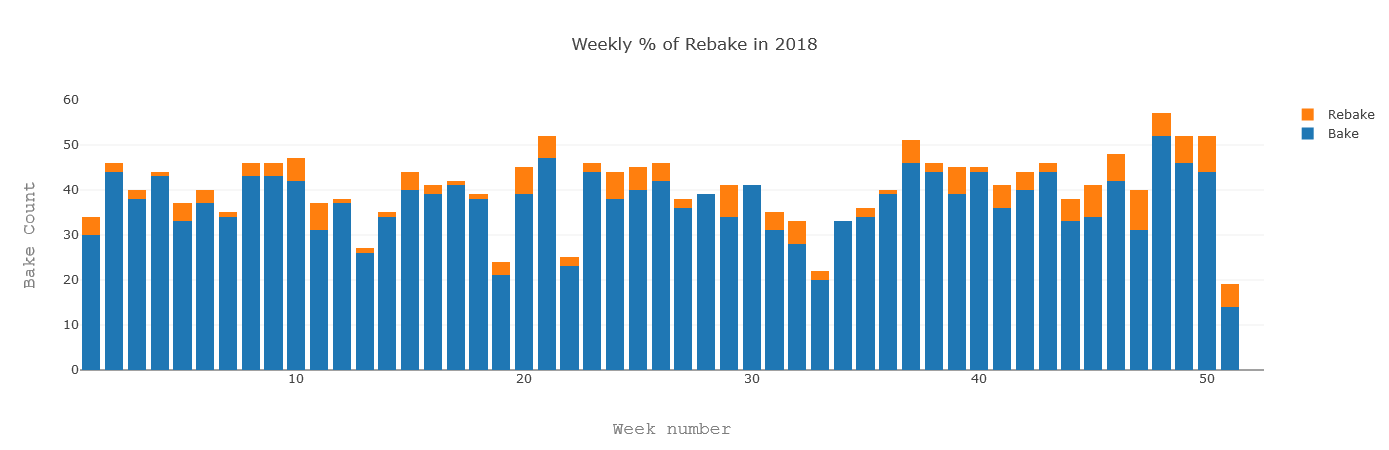

In [231]:
# Plot the number of rebake & normal charges per week
weeklySuccessBakeCountTrace = ply.graph_objs.Bar(x=weeklyRebakeDf['weekNumber'],
                                                 y=weeklyRebakeDf['totalBakeCount'] - weeklyRebakeDf['rebakeCount'],
                                                 name='Bake',
                                                 marker=dict(color=myColorScale['muted blue']),
                                                 )

weeklyRebakeCountTrace = ply.graph_objs.Bar(x=weeklyRebakeDf['weekNumber'],
                                            y=weeklyRebakeDf['rebakeCount'],
                                            name='Rebake',
                                            marker=dict(color=myColorScale['safety orange']),
                                            )


dataToPlot = [weeklySuccessBakeCountTrace, weeklyRebakeCountTrace]
barPlotLayout = ply.graph_objs.Layout(
    title='Weekly % of Rebake in 2018',
    xaxis=dict(
        title='Week number',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Bake Count',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    barmode='stack'
)

fig = ply.graph_objs.Figure(data=dataToPlot, layout=barPlotLayout)

graphFilename = outputDir + 'Fours - Weekly number of BAke and Rebake.html'

if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)


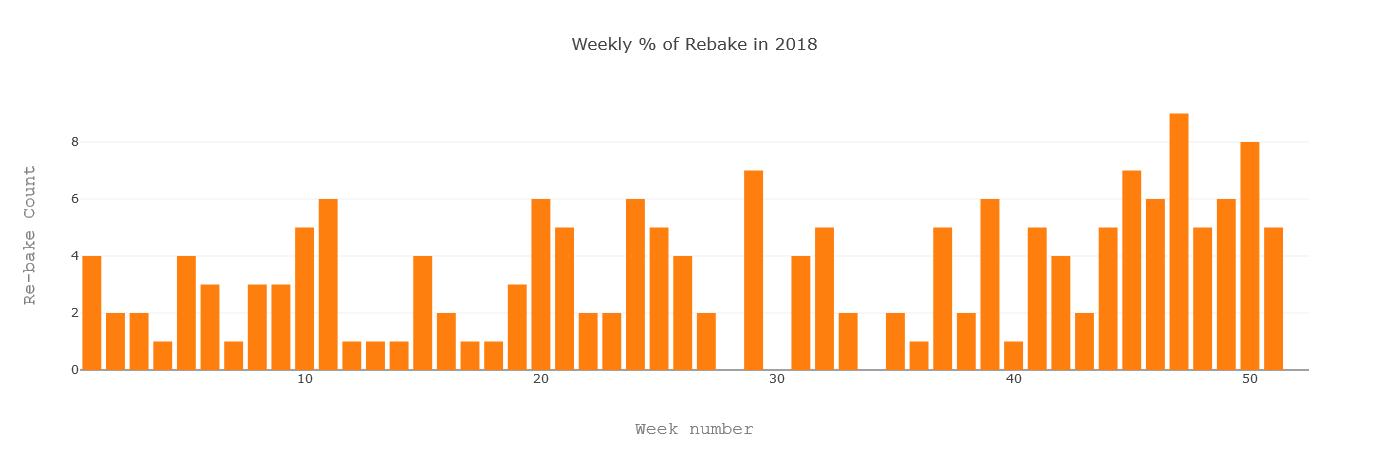

In [232]:
# Plot the number of rebake charges per week
weeklyRebakeCountTrace = ply.graph_objs.Bar(x=weeklyRebakeDf['weekNumber'],
                                            y=weeklyRebakeDf['rebakeCount'],
                                            name='Rebake',
                                            marker=dict(color=myColorScale['safety orange']),
                                            )

dataToPlot = [weeklyRebakeCountTrace]
barPlotLayout = ply.graph_objs.Layout(
    title='Weekly % of Rebake in 2018',
    xaxis=dict(
        title='Week number',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Re-bake Count',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = ply.graph_objs.Figure(data=dataToPlot, layout=barPlotLayout)

graphFilename = outputDir + 'Fours - Weekly number of Rebake.html'

if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)


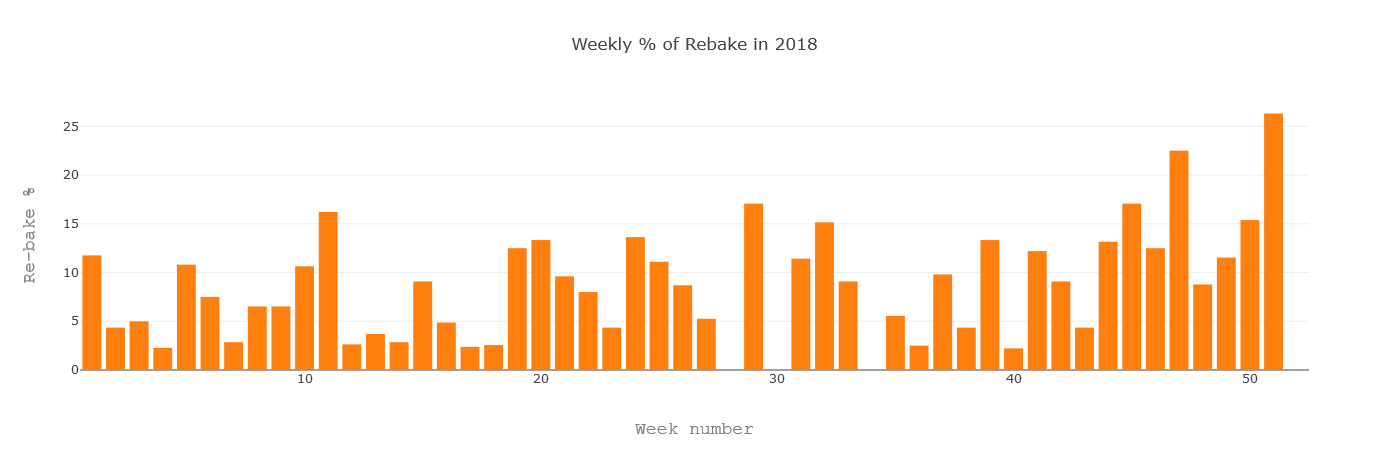

In [233]:
# Plot % of reBake charges per week
weeklyRebakePercentTrace = ply.graph_objs.Bar(x=weeklyRebakeDf['weekNumber'],
                                              y=weeklyRebakeDf['percentRebake'],
                                              name='Rebake',
                                              marker=dict(color=myColorScale['safety orange']),
                                              )

dataToPlot = [weeklyRebakePercentTrace]

barPlotLayout = ply.graph_objs.Layout(
    title='Weekly % of Rebake in 2018',
    xaxis=dict(
        title='Week number',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Re-bake %',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = ply.graph_objs.Figure(data=dataToPlot, layout=barPlotLayout)

graphFilename = outputDir + 'Fours - Weekly % of Rebake.html'

if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)


In [234]:
# Dummy cell for easier interaction during execution of this notebook


### Get a feel of the rebake we are getting

In [235]:
newOFsSortedDF = newOFsDF.copy()

newOFsSortedDF = newOFsSortedDF.sort_values(by='BakeCount', ascending=False)

newOFsSortedDF

,OF,BakeCount,uStartDateTimeArray,uEndDateTimeArray
5278,307836,4,"[2018-11-12T01:06:19.000000000, 2018-11-14T21:...","[2018-11-12T12:09:12.000000000, 2018-11-15T05:..."
4859,306420,4,"[2018-10-19T08:26:12.000000000, 2018-10-21T11:...","[2018-10-20T00:46:33.000000000, 2018-10-22T03:..."
1099,302005,4,"[2018-03-06T20:33:10.000000000, 2018-03-12T20:...","[2018-03-07T13:31:58.000000000, 2018-03-13T09:..."
5506,308448,4,"[2018-11-22T05:26:31.000000000, 2018-11-22T13:...","[2018-11-22T18:27:48.000000000, 2018-11-23T02:..."
885,301607,3,"[2018-02-27T04:04:10.000000000, 2018-03-05T11:...","[2018-02-27T14:05:56.000000000, 2018-03-05T16:..."
1590,301492,3,"[2018-04-09T21:38:33.000000000, 2018-04-10T03:...","[2018-04-10T08:39:09.000000000, 2018-04-10T14:..."
5492,308082,3,"[2018-11-21T19:55:38.000000000, 2018-11-23T18:...","[2018-11-22T11:55:37.000000000, 2018-11-23T22:..."
5493,308260,3,"[2018-11-21T19:55:38.000000000, 2018-11-23T18:...","[2018-11-22T11:55:37.000000000, 2018-11-23T22:..."
5494,308261,3,"[2018-11-21T19:55:38.000000000, 2018-11-23T18:...","[2018-11-22T11:55:37.000000000, 2018-11-23T22:..."
1359,300933,3,"[2018-03-23T12:09:19.000000000, 2018-04-07T02:...","[2018-03-24T05:03:16.000000000, 2018-04-07T06:..."


In [236]:
# Dummy cell for easier interaction during execution of this notebook


### Get a feel for  the change over time for each oven

Oven 45: Processing ...
Oven 49: Processing ...
Oven 65: Processing ...
Oven 67: Processing ...
Oven 68: Processing ...


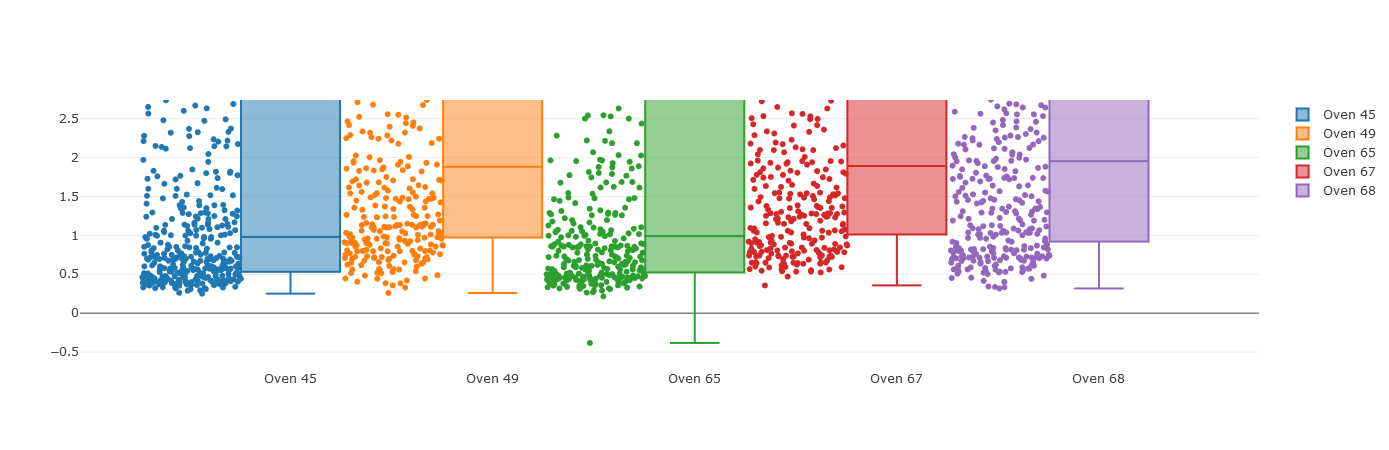

In [237]:
verboseThisCell = True
ovenOfInterest = [45, 49, 65, 67, 68]
graphTraces = []


for ovenID in ovenOfInterest:
    if verboseThisCell is True:
        print("Oven {}: Processing ...".format(ovenID))
    ovenOrderedChargesDf = tmpChargeDF[tmpChargeDF.uidOven == ovenID]
    # .. don't forget to reset the index, as sort shuffles it
    ovenOrderedChargesDf = ovenOrderedChargesDf.reset_index(drop=True)

    # .. Prepare a measure of "changeover time" for each four
    lastStartTime = ovenOrderedChargesDf.loc[0, 'uStartDateTime']
    lastEndTime = ovenOrderedChargesDf.loc[0, 'uEndDateTime']

    # .. loop throught each charge ..
    for index, row in ovenOrderedChargesDf[1:].iterrows():
        startTime = row.uStartDateTime
        # ... check last end time is not bigger than current start time
        if lastEndTime > startTime:
            dontCare = True
            # print("Warning at index{}: {} > {} !!!!".format(index, lastEndTime, startTime))
        # ... check strat time are in chronological order
        if lastStartTime > startTime:
            print("ERROR: start time not sorted at index{}: {} > {} !!!!".format(index, lastStartTime, startTime))
        # ... calculate a reload time (time from end of last charge to start of current charge) in hours
        ovenOrderedChargesDf.loc[index, 'changeOverTime'] = (startTime - lastEndTime) / np.timedelta64(1, 'h')
        # ... update last start and end time for next charge to process
        lastStartTime = row.uStartDateTime
        lastEndTime = row.uEndDateTime

    # .. Prepare graph trace
    ovenTrace = ply.graph_objs.Box(
        y=ovenOrderedChargesDf['changeOverTime'],
        boxpoints='all',
        jitter=1,
        pointpos=-2,
        name="Oven {}".format(ovenID))
    graphTraces.append(ovenTrace)

# Plot
graphFilename = outputDir + 'Fours - Reload Time.html'
dataToPlot = graphTraces
fig = ply.graph_objs.Figure(data=dataToPlot)
if (notebookGraphingOutputs == GraphOutputOption('htmlFile')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.plot(fig, filename=graphFilename, auto_open=GraphAutoOpenHTML)
if (notebookGraphingOutputs == GraphOutputOption('inline')) or (notebookGraphingOutputs == GraphOutputOption('both')):
    ply.offline.iplot(fig)


In [244]:
# Investigate negative changeover times!!
verboseThisCell = True
ovenOfInterest = [45, 49, 65, 67, 68]
graphTraces = []


for ovenID in ovenOfInterest:
    if verboseThisCell is True:
        print("Oven {}: Processing ...".format(ovenID))
    ovenOrderedChargesDf = tmpChargeDF[tmpChargeDF.uidOven == ovenID]
    # .. don't forget to reset the index, as sort shuffles it
    ovenOrderedChargesDf = ovenOrderedChargesDf.reset_index(drop=True)

    # .. Prepare a measure of "changeover time" for each four
    lastStartTime = ovenOrderedChargesDf.loc[0, 'uStartDateTime']
    lastEndTime = ovenOrderedChargesDf.loc[0, 'uEndDateTime']

    # .. loop throught each charge ..
    for index, row in ovenOrderedChargesDf[1:].iterrows():
        startTime = row.uStartDateTime
        # ... check last end time is not bigger than current start time
        if lastEndTime > startTime:
            dontCare = True
            # print("Warning at index{}: {} > {} !!!!".format(index, lastEndTime, startTime))
        # ... check strat time are in chronological order
        if lastStartTime > startTime:
            print("ERROR: start time not sorted at index{}: {} > {} !!!!".format(index, lastStartTime, startTime))
        # ... calculate a reload time (time from end of last charge to start of current charge) in hours
        changeOverDuration = (startTime - lastEndTime) / np.timedelta64(1, 'h')
        ovenOrderedChargesDf.loc[index, 'changeOverTime'] = changeOverDuration
        # ... report any negative times
        if changeOverDuration <= 0:
            print("WARNING: negative changeover at index {}: last end: {} > current start: {} !!!!".format(index, lastEndTime, startTime))
            display(ovenOrderedChargesDf[index - 1:index + 1])
        # ... update last start and end time for next charge to process
        lastStartTime = row.uStartDateTime
        lastEndTime = row.uEndDateTime

Oven 45: Processing ...


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
34,2018450223.0,45,2018-01-28T13:01:21.000000000,2018-01-29T06:01:21.000000000,False,NaN,3,"[300160, 300045, 300158]",17.0,33.967778
35,2018451370.0,45,2018-01-28T20:46:00.000000000,2018-01-29T13:46:00.000000000,False,NaN,1,[300170],17.0,-9.255833


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
35,2018451370.0,45,2018-01-28T20:46:00.000000000,2018-01-29T13:46:00.000000000,False,NaN,1,[300170],17.000000,-9.255833
36,2018451931.0,45,2018-01-29T10:21:25.000000000,2018-01-29T20:21:27.000000000,False,NaN,1,[300582],10.000556,-3.409722


Oven 49: Processing ...


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
31,2018490481.0,49,2018-01-30T17:56:00.000000000,2018-01-31T04:56:00.000000000,False,NaN,1,[300557],11.000000,35.865278
32,2018491014.0,49,2018-01-30T17:56:19.000000000,2018-01-31T04:56:26.000000000,False,NaN,2,"[300898, 300899]",11.001944,-10.994722


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
106,2018491081.0,49,2018-04-15T19:01:00.000000000,2018-04-16T06:03:00.000000000,False,NaN,1,[301639],11.033333,42.459444
107,2018490737.0,49,2018-04-15T19:01:29.000000000,2018-04-16T06:03:38.000000000,False,NaN,3,"[301306, 302493, 301843]",11.035833,-11.025278


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
196,2018491764.0,49,2018-07-05T12:13:00.000000000,2018-07-05T22:13:00.000000000,False,NaN,1,[305406],10.000000,10.326944
197,2018490771.0,49,2018-07-05T12:13:54.000000000,2018-07-05T18:31:59.000000000,False,NaN,2,"[305316, 305315]",6.301389,-9.985000


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
378,2018490836.0,49,2018-12-08T18:03:14.000000000,2018-12-09T07:33:58.000000000,False,NaN,1,[308637],13.512222,20.417500
379,2018491433.0,49,2018-12-08T18:22:00.000000000,2018-12-09T07:22:00.000000000,False,NaN,1,[306613],13.000000,-13.199444


Oven 65: Processing ...


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
262,2018651300.0,65,2018-09-03T21:40:58.000000000,2018-09-05T13:40:00.000000000,False,NaN,4,"[306798, 305422, 305746, 305747]",39.983889,18.238611
263,2018651723.0,65,2018-09-04T14:40:00.000000000,2018-09-05T03:40:00.000000000,False,NaN,2,"[305624, 305954]",13.000000,-23.000000


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
294,2018650978.0,65,2018-10-02T14:05:00.000000000,2018-10-03T06:05:00.000000000,False,NaN,3,"[306343, 306050, 307324]",16.0000,1.355833
295,2018651068.0,65,2018-10-03T05:42:02.000000000,2018-10-03T21:38:17.000000000,False,NaN,2,"[306242, 306241]",15.9375,-0.382778


Oven 67: Processing ...


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
13,2018670516.0,67,2018-01-11T15:00:00.000000000,2018-01-12T02:15:00.000000000,False,NaN,1,[300607],11.250000,1.095278
14,2018670404.0,67,2018-01-11T15:15:21.000000000,2018-01-12T02:15:51.000000000,False,NaN,2,"[300606, 300055]",11.008333,-10.994167


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
242,2018671374.0,67,2018-07-24T20:33:00.000000000,2018-07-25T06:33:00.000000000,False,NaN,1,[304339],10.000000,12.0750
243,2018671037.0,67,2018-07-24T20:33:09.000000000,2018-07-25T06:33:11.000000000,False,NaN,5,"[304340, 304349, 305489, 304181, 304338]",10.000556,-9.9975


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
265,2018670133.0,67,2018-09-16T11:59:00.000000000,2018-09-16T21:59:00.000000000,False,NaN,1,[305934],10.000000,37.760278
266,2018671406.0,67,2018-09-16T11:59:53.000000000,2018-09-16T21:59:52.000000000,True,NaN,1,[305934],9.999722,-9.985278


Oven 68: Processing ...


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
37,2018680552.0,68,2018-02-04T19:20:00.000000000,2018-02-05T12:20:00.000000000,False,NaN,3,"[300384, 301077, 300075]",17.000000,41.031389
38,2018681631.0,68,2018-02-04T19:20:15.000000000,2018-02-05T12:20:00.000000000,False,NaN,1,[300059],16.995833,-16.995833


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
68,2018681716.0,68,2018-03-01T10:59:00.000000000,2018-03-01T22:22:42.000000000,False,NaN,2,"[301654, 301655]",11.395,11.400278
69,2018681794.0,68,2018-03-01T11:00:00.000000000,2018-03-01T22:00:00.000000000,False,NaN,1,[300783],11.000,-11.378333


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
70,2018681795.0,68,2018-03-02T03:28:00.000000000,2018-03-02T14:28:00.000000000,True,NaN,1,[300783],11.000000,5.466667
71,2018680677.0,68,2018-03-02T03:28:06.000000000,2018-03-02T14:30:16.000000000,False,NaN,2,[300777],11.036111,-10.998333


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
117,2018681212.0,68,2018-04-12T11:09:00.000000000,2018-04-12T22:08:00.000000000,False,NaN,1,[302906],10.983333,30.623889
118,2018680156.0,68,2018-04-12T11:09:34.000000000,2018-04-12T22:08:12.000000000,False,NaN,11,"[302156, 303086, 303122, 302155, 303172, 30285...",10.977222,-10.973889


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
305,2018680347.0,68,2018-09-16T12:01:00.000000000,2018-09-16T22:01:00.000000000,False,NaN,2,"[305533, 305432]",10.000000,33.516944
306,2018681356.0,68,2018-09-16T12:02:00.000000000,2018-09-16T22:01:00.000000000,False,NaN,1,[307149],9.983333,-9.983333


,uidCharge,uidOven,uStartDateTime,uEndDateTime,ReBake,Bake#,OFCount,OFs,bakeDuration,changeOverTime
331,2018682021.0,68,2018-10-04T01:08:00.000000000,2018-10-04T17:12:00.000000000,False,NaN,1,[307056],16.066667,3.033333
332,2018681650.0,68,2018-10-04T01:08:11.000000000,2018-10-04T17:12:53.000000000,False,NaN,5,"[306056, 307360, 306994, 306277, 306321]",16.078333,-16.063611


In [238]:
# Dummy cell for easier interaction during execution of this notebook


In [60]:
# Dummy cell for easier interaction during execution of this notebook


In [61]:
# End of Notebook